# Crime Analysis System For Preventing Future Crime:

## **DataSet1 Description:** 

The dataset contains the data for **crime rate in the state of North Carolina**  aggregated by county.

## **DataSet Attributes:**

1. county - county identifier
2. year - 1987
3. crmrte - crimes committed per person
4. prbarr - 'probability' of arrest
5. prbconv - 'probability' of conviction
6. prbpris - 'probability' of prison sentence
7. avgsen - avg. sentence, days
8. polpc - police per capita
9. density - people per sq. mile
10. taxpc - tax revenue per capita
11. west - =1 if in western N.C.
12. central - =1 if in central N.C.
13. urban - =1 if in SMSA
14. pctmin80 - perc. minority, 1980
15. wcon - weekly wage, construction
16. wtuc - wkly wge, trns, util, commun
17. wtrd - wkly wge, whlesle, retail trade
18. wfir - wkly wge, fin, ins, real est
19. wser - wkly wge, service industry
20. wmfg - wkly wge, manufacturing
21. wfed - wkly wge, fed employees
22. wsta - wkly wge, state employees
23. wloc - wkly wge, local gov emps
24. mix - offense mix: face-to-face/other
25. pctymle - percent young male    

## First Objective:

1. To do a **univariate** and **bivariate exploratory analysis** of data and report the findings. <br/>
2. To develop a suitable **linear model with crmrte as the dependent variable** and explain the various aspects of the model. 

# Importing Libraries:

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import folium
import squarify
import warnings
import gmplot
import os
warnings.filterwarnings("ignore")
from sodapy import Socrata
import collections;
import re;
from time import time
from collections import defaultdict

from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import PassiveAggressiveClassifier

# Load Data:

In [115]:
crimeData = pd.read_csv("crime_v2.csv")
print (crimeData.shape)
crimeData.head(5)

(91, 25)


county  year    crmrte    prbarr   prbconv   prbpris  avgsen     polpc  \
0       1    87  0.035604  0.298270  0.527596  0.436170    6.71  0.001828   
1       3    87  0.015253  0.132029  1.481480  0.450000    6.35  0.000746   
2       5    87  0.012960  0.444444  0.267857  0.600000    6.76  0.001234   
3       7    87  0.026753  0.364760  0.525424  0.435484    7.14  0.001530   
4       9    87  0.010623  0.518219  0.476563  0.442623    8.22  0.000860   

    density      taxpc  ...        wtuc        wtrd        wfir        wser  \
0  2.422633  30.993681  ...  408.724487  221.270065  453.172211  274.177460   
1  1.046332  26.892078  ...  376.254181  196.010101  258.564972  192.307693   
2  0.412766  34.816051  ...  372.208435  229.320892  305.944061  209.697220   
3  0.491557  42.947586  ...  397.690125  191.172012  281.065094  256.721435   
4  0.546948  28.054739  ...  377.312561  206.821487  289.312469  215.193329   

         wmfg        wfed        wsta        wloc       mix   pctymle  
0  334.540008  477.579987  292.089996  311.910004  0.080169  0.077871  
1  300.380005  409.829987  362.959992  301.470001  0.030227  0.082607  
2  237.649994  358.980011  331.529999  281.369995  0.465116  0.072115  
3  281.799988  412.149994  328.269989  299.029999  0.273622  0.073537  
4  290.890015  377.350006  367.230011  342.820007  0.060086  0.070698  

[5 rows x 25 columns]

# Data Cleaning:

In [116]:
# Checking characteristics of data.
crimeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 25 columns):
county      91 non-null int64
year        91 non-null int64
crmrte      91 non-null float64
prbarr      91 non-null float64
prbconv     91 non-null float64
prbpris     91 non-null float64
avgsen      91 non-null float64
polpc       91 non-null float64
density     91 non-null float64
taxpc       91 non-null float64
west        91 non-null int64
central     91 non-null int64
urban       91 non-null int64
pctmin80    91 non-null float64
wcon        91 non-null float64
wtuc        91 non-null float64
wtrd        91 non-null float64
wfir        91 non-null float64
wser        91 non-null float64
wmfg        91 non-null float64
wfed        91 non-null float64
wsta        91 non-null float64
wloc        91 non-null float64
mix         91 non-null float64
pctymle     91 non-null float64
dtypes: float64(20), int64(5)
memory usage: 17.9 KB


In [117]:
# To check how many zeros in each column - to find out missing data
print('\n\nNumber of zeroes for each Feature:')
(crimeData==0).sum()



Number of zeroes for each Feature:


county       0
year         0
crmrte       0
prbarr       0
prbconv      0
prbpris      0
avgsen       0
polpc        0
density      0
taxpc        0
west        68
central     57
urban       83
pctmin80     0
wcon         0
wtuc         0
wtrd         0
wfir         0
wser         0
wmfg         0
wfed         0
wsta         0
wloc         0
mix          0
pctymle      0
dtype: int64

## Observation: 
There are 91 entries for all the 25 columns. Hence, there is **no missing value in the input dataset. Thus, no need to do data imputation** or to drop any feature.
      

# Univariate Analysis Objective:

Univariate visualization   provides summary statistics for each field in the raw data set. It is conducted **to find out how much a single feature in the dataset** would be helpful to determine the target feature, here in this case, crime rate.


## Distribution of Target Variable:

Statistics of Crime Rate: 

count    91.000000
mean      0.033400
std       0.018811
min       0.005533
25%       0.020927
50%       0.029986
75%       0.039642
max       0.098966
Name: crmrte, dtype: float64


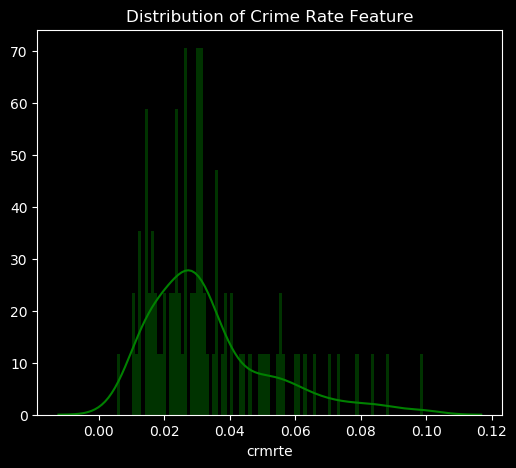

In [118]:
# Numerical data distribution of dependant variable: Crime Rate

print('Statistics of Crime Rate: \n')
print(crimeData['crmrte'].describe())
plt.figure(figsize=(6, 5))
plt.title('Distribution of Crime Rate Feature')
sns.distplot(crimeData['crmrte'], color='g', bins=100, hist_kws={'alpha': 0.4})

## Distribution of All Features:

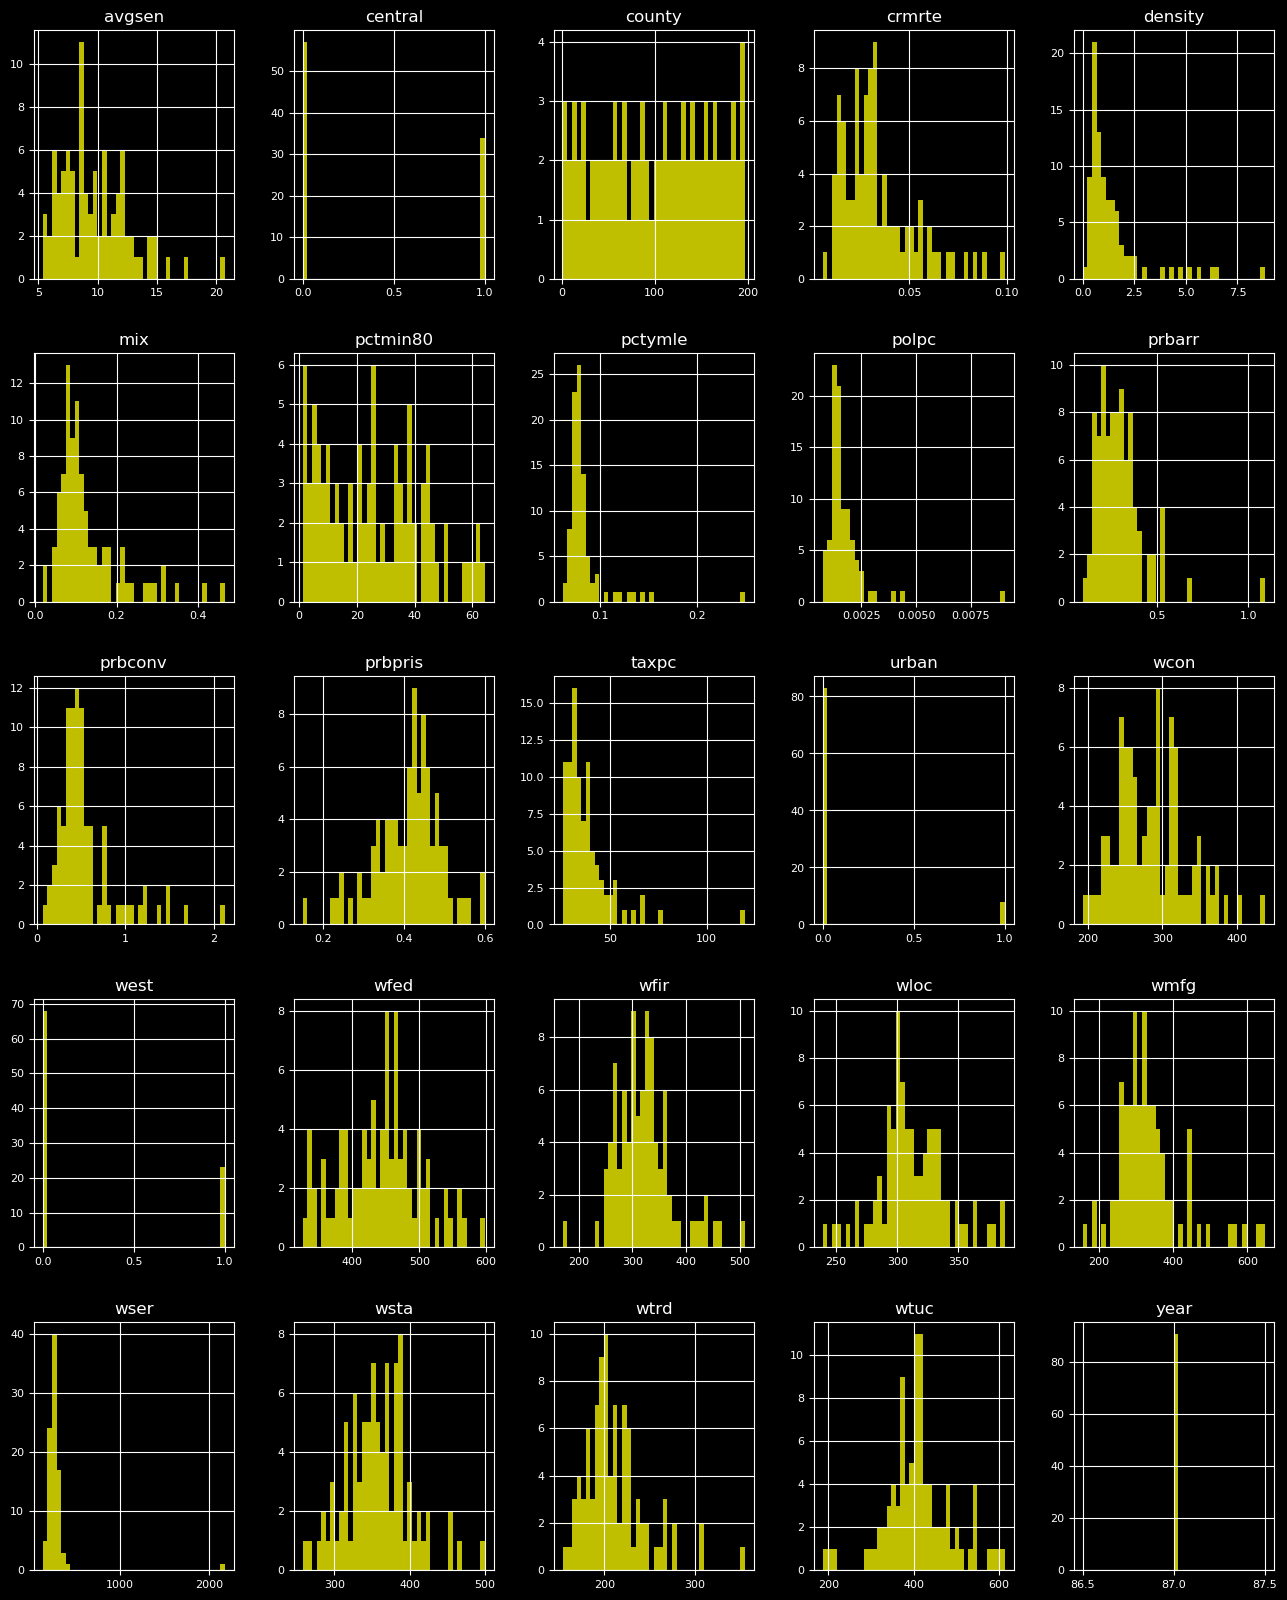

In [119]:
crimeData.hist(figsize=(16, 20), bins=40, xlabelsize=8, ylabelsize=8, color='y'); 

# Observation:

The features **density, mix, police per capita, probability of conviction and tax revenue per capita seems to have similar distribution as crime rate.** But no definitive conclusion can be made from this observation. Lets examine further using bivariate analysis.

## Probability Distribution Funtion(PDF) and Cumulative Distribution Function (CDF)

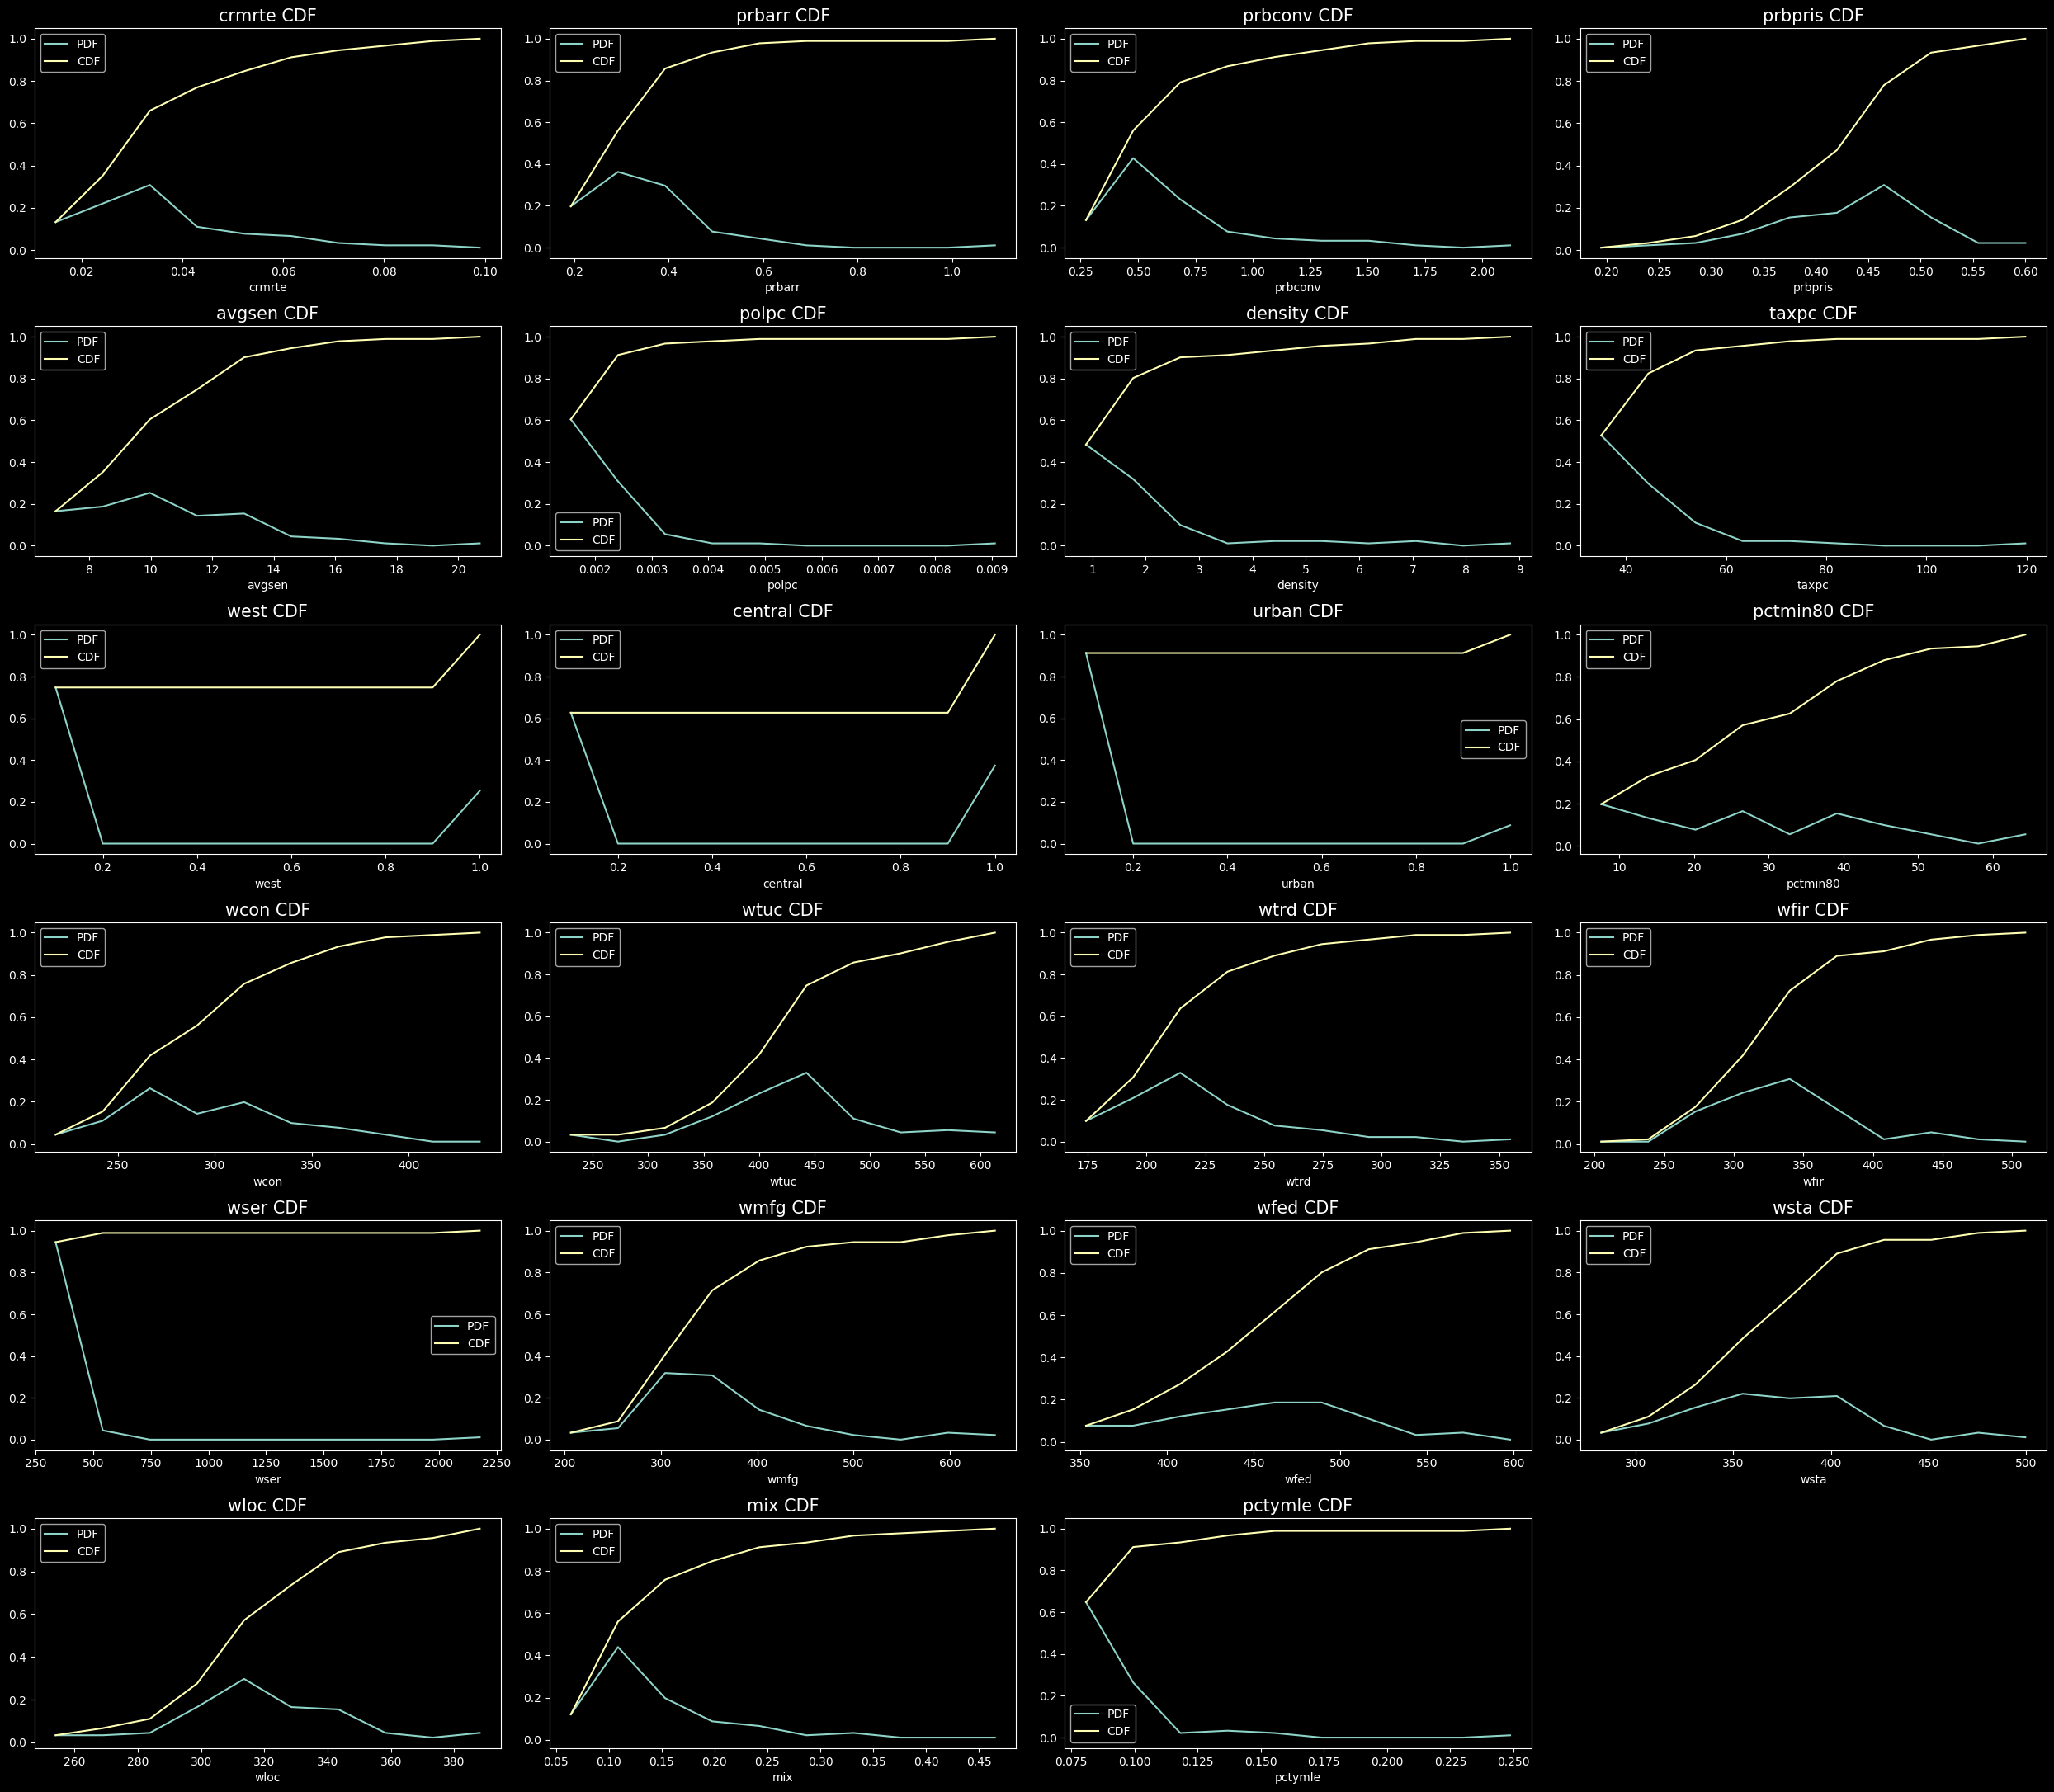

In [120]:
plt.figure(figsize=(25,25))

for idx, col in enumerate(crimeData.columns[2:]): #excluding county & year
    counts, bin_edges = np.histogram(crimeData[col], bins=10, density = True)
    pdf = counts/(sum(counts))
    cdf = np.cumsum(pdf)
    
    plt.subplot(7, 4, idx+1)
    plt.plot(bin_edges[1:],pdf, label='PDF')
    plt.plot(bin_edges[1:],cdf, label='CDF')
    plt.title(col + " CDF",fontsize=15)
    plt.xlabel(col)
#     plt.ylabel('Probability')
    plt.tight_layout()

    plt.legend()


# Observations:

a) One **strange observation is in weekly wages of service industry (wser).** More than 95% of wages lies below 400, but the maximum wage is around 2250. 

b) Though the maximum value of tax revenue per capita is 120, more than 50% of values lies below 40.

c) Though the maximum value of police per capita is 0.009, more than 60% of values lies below 0.001. 

# Bivariate Analysis:

Bivariate visualization  is performed to find the relationship between each variable in the dataset and the target variable of interest, i.e. crime rate.

The plot of all features against crime rate is done as below.

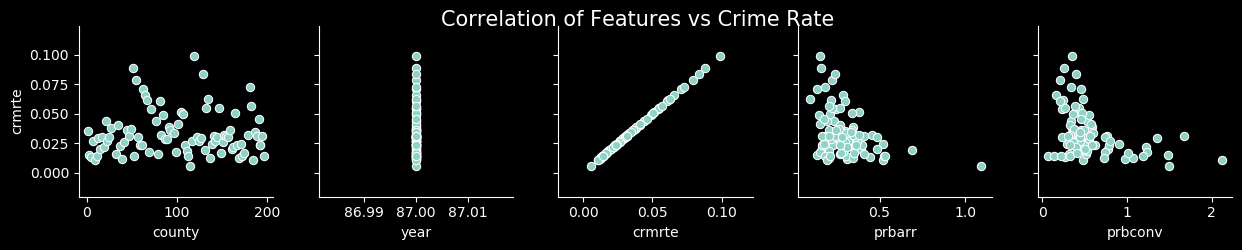

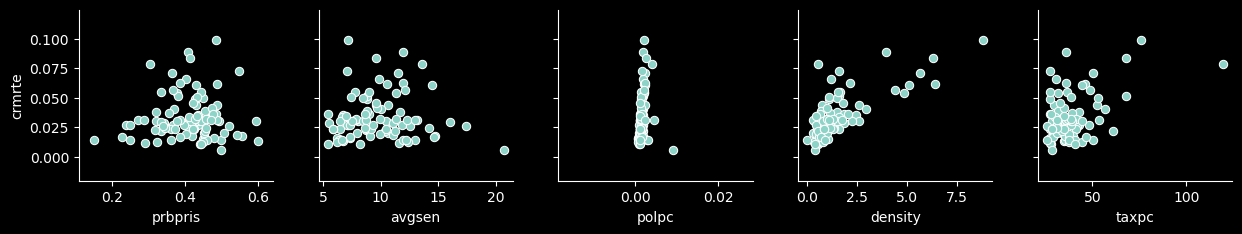

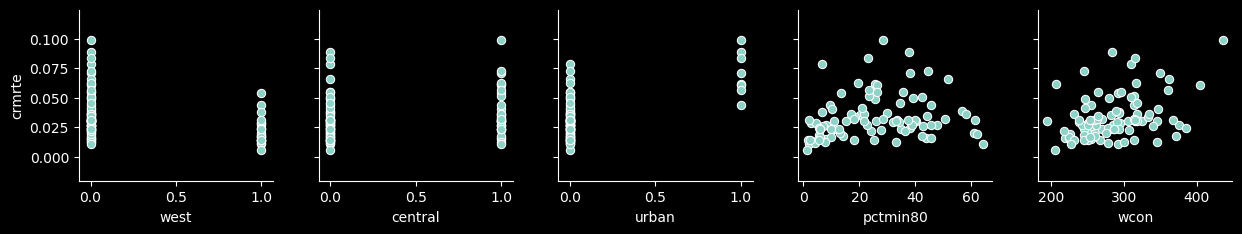

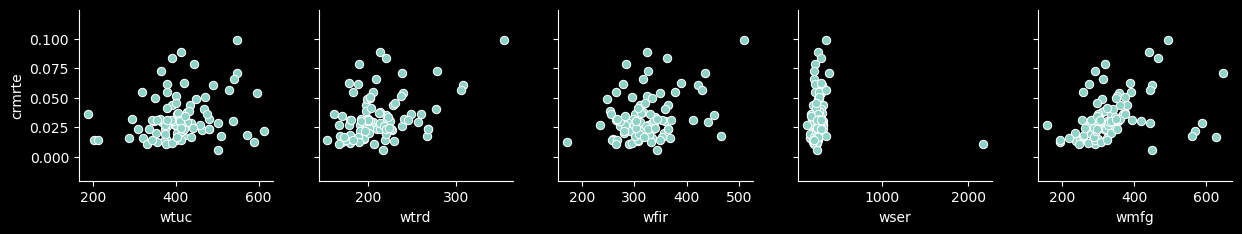

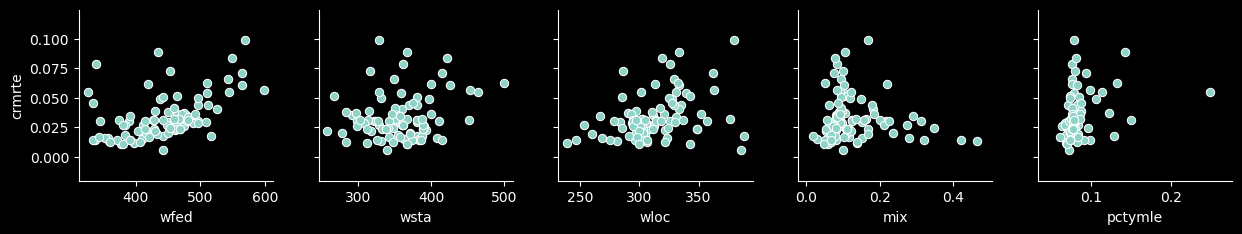

In [121]:
# To plot the correlation of all features against crime rate

for i in range(0, len(crimeData.columns), 5):
    sns.pairplot(data=crimeData,
                x_vars=crimeData.columns[i:i+5],
                y_vars=['crmrte'])
    if i == 0:
        plt.suptitle('Correlation of Features vs Crime Rate', fontsize = 15)

# Observations:

a) Based on the above pairplot, it can be noted that **density is most positively correlated with crime rate. There is also some correlation with weekly wages under different domains but it needs further investigation, as they are not so pronounced.**

b) Strangely, the **weekly wage features and crime rate is found to be slightly positively correlated. This signifies unequal distribution of income** or probably high unemployment rate. One of the most important features that is not in the given data may be unemployment rate.

Lets try to find if there is any correlation among features for each location: 'west', 'central' & 'urban'.

Number of data points in category: west is 23
Number of data points in category: central is 34
Number of data points in category: urban is 8


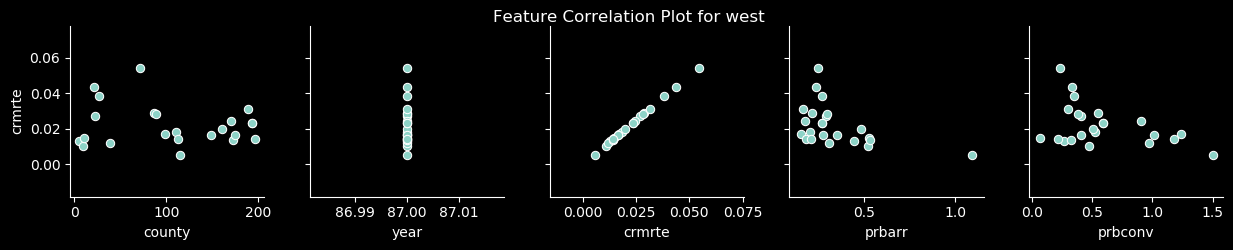

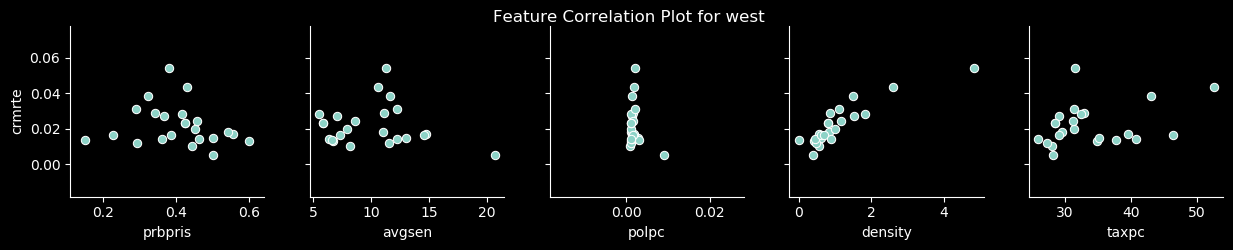

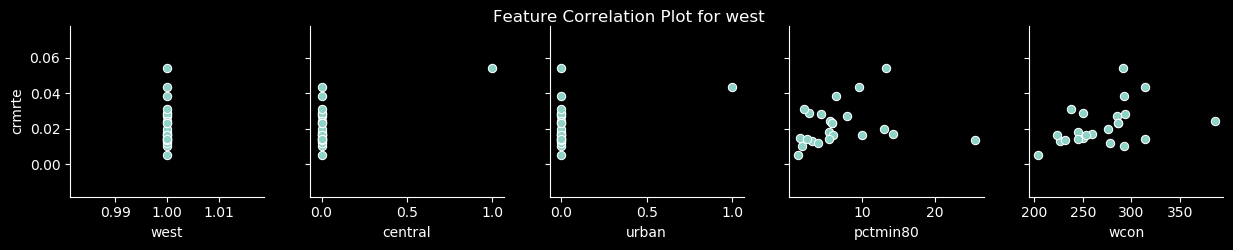

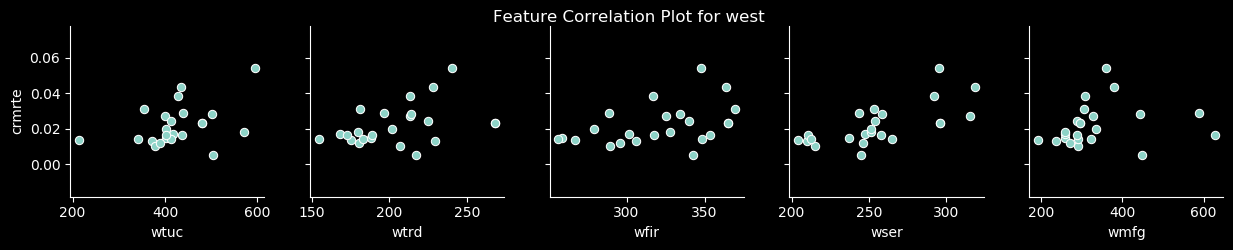

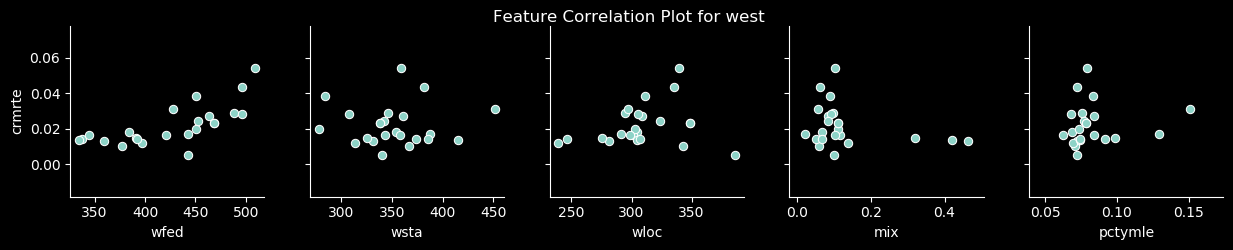

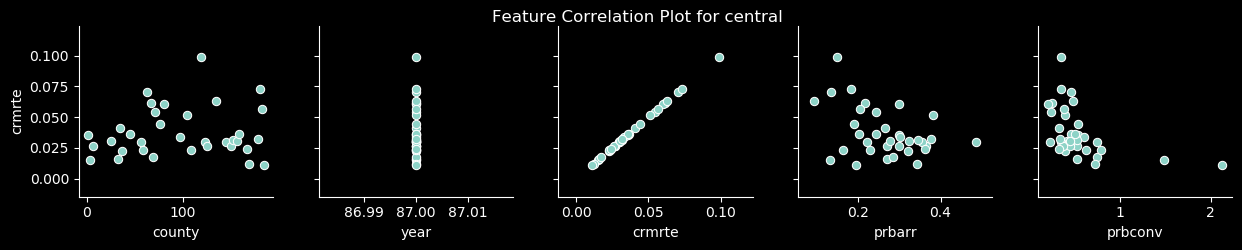

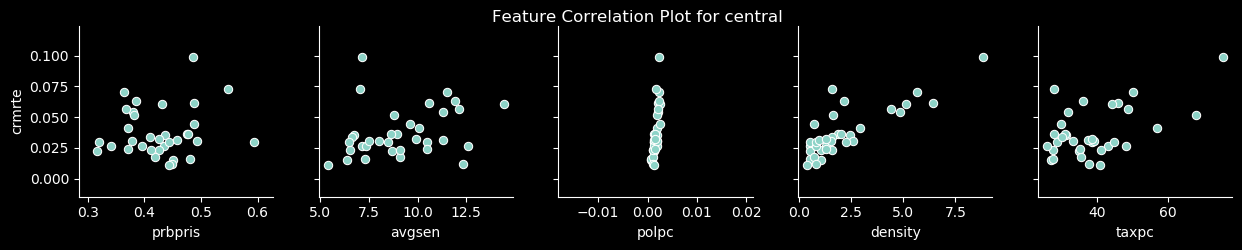

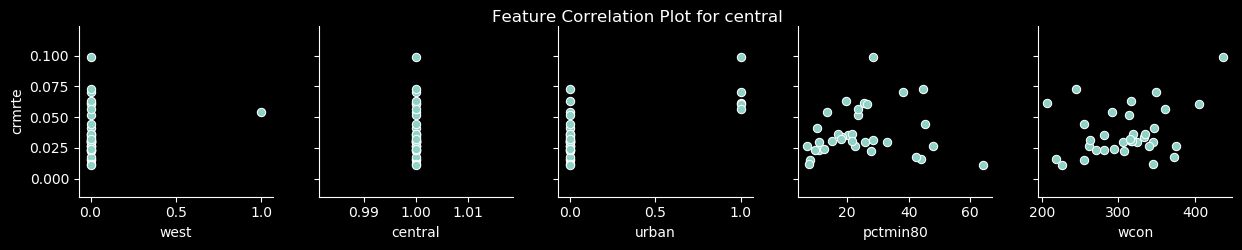

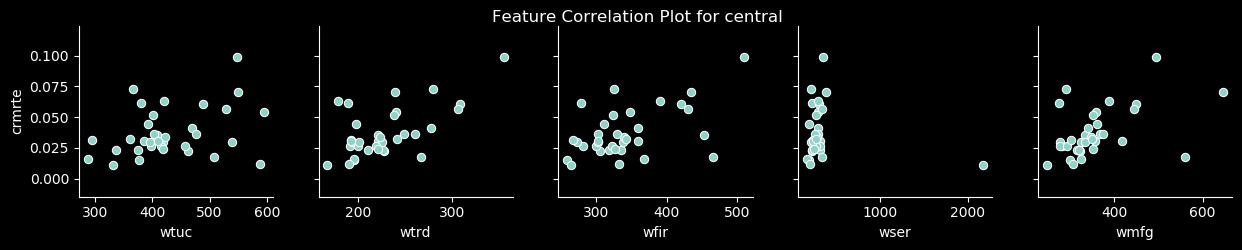

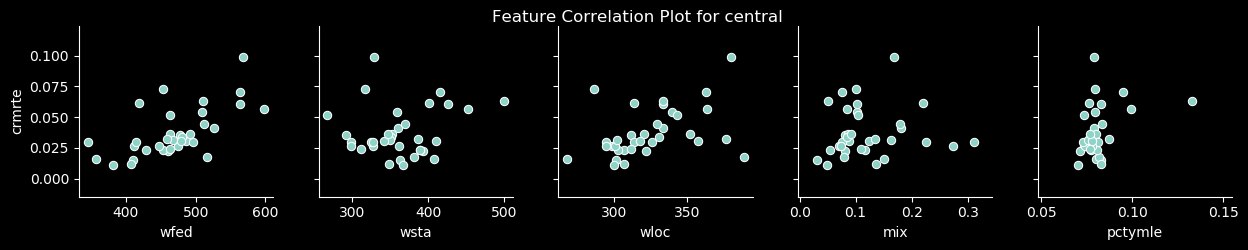

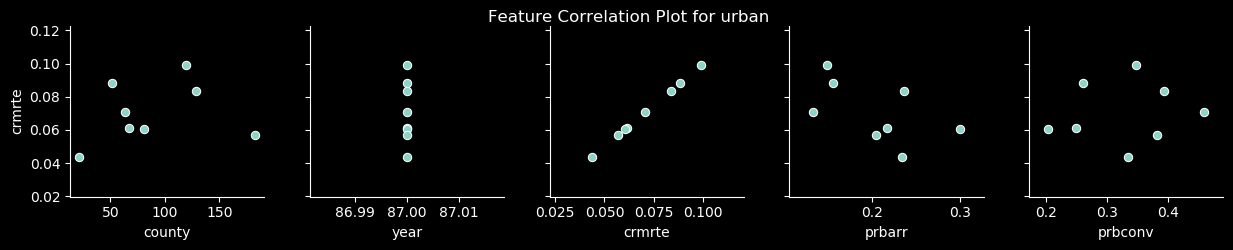

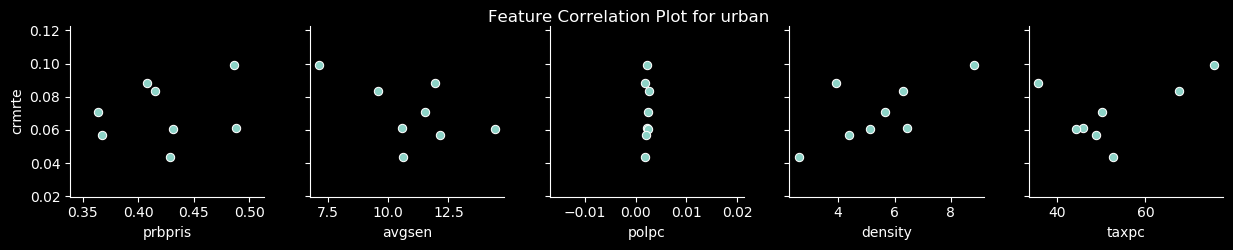

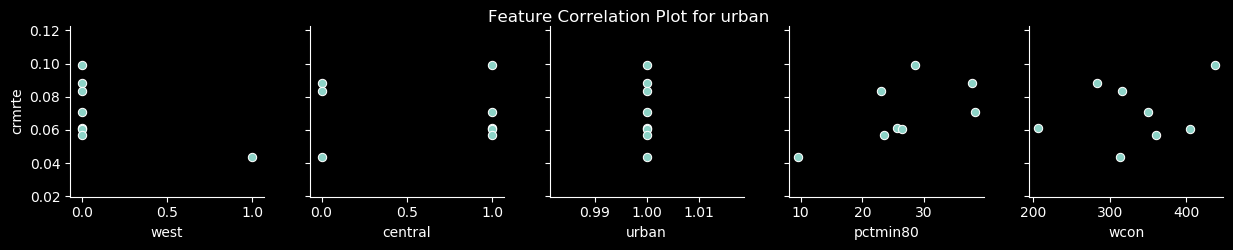

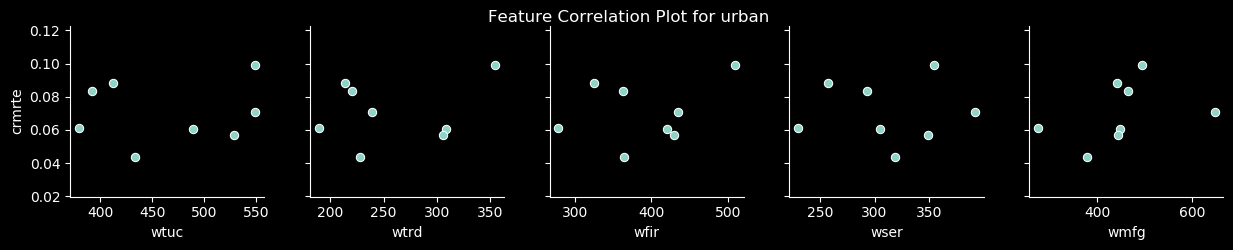

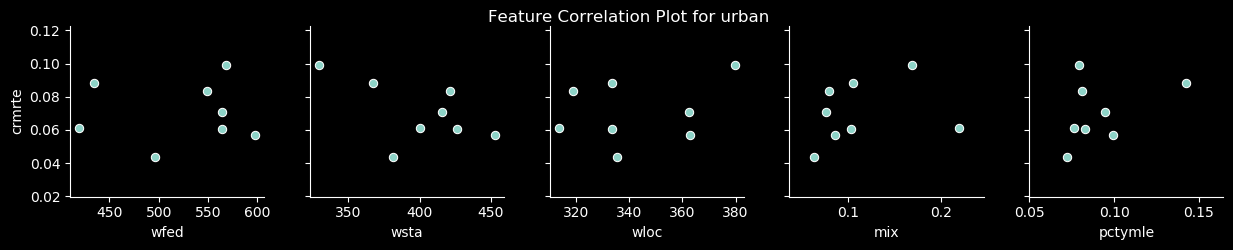

In [122]:
# To plot the correlation of boolean features against crime rate

# Categories: west, central and urban
categories = ['west', 'central', 'urban']

for category in categories:
    
    categoricalCrime = crimeData[crimeData[category] == 1]
    print('Number of data points in category: ' + 
                          category + ' is '+ str(len(categoricalCrime)))

    for i in range(0, len(categoricalCrime.columns), 5):
        
        sns.pairplot(data=categoricalCrime,
                    x_vars=categoricalCrime.columns[i:i+5],
                    y_vars=['crmrte'])
#          plt.title('Feature Correlation Plot for ' + category, loc = 'left')
        plt.suptitle('Feature Correlation Plot for ' + category)


# Observations:

1) Some of the correlation lines are showing upward or downward trends more than before. 

2) **Probability of conviction is found to have negative correlation with crime rate in both west and central, but not in urban areas.**

3) **Tax Per capita is found to have positive correlation with crime rate in both central and urban areas.**

4) **Percentage of minority is positively correlated with crime rate, both in west and in urban areas.**

5) Thus, a combination of density and location (urban/ west/ central) might help aid crime rate prediction.

6) However, there seems to be **not much data for 'urban areas'** to arrive at a conclusion.

## Linear Regression Fit of Strongly Correlated Features

We have a lot of features to analyse in the input dataset. So let's take the strongly correlated quantitative features from this dataset and analyse them one by one.

In [123]:
# To find out strongly correlated values with crime rate. 
# 40% is taken as the threshold beyond which we include the feature in model. 

crimeData_corr = crimeData.corr()['crmrte']
selected_features_list = crimeData_corr[
                abs(crimeData_corr) > 0.4].sort_values(ascending=False)
print("There are {} strongly correlated values with Crime Rate:\n{}".format(
                len(selected_features_list), selected_features_list))

print(list(selected_features_list.index))

There are 6 strongly correlated values with Crime Rate:
crmrte     1.000000
density    0.728963
urban      0.615602
wfed       0.486156
taxpc      0.450980
wtrd       0.410106
Name: crmrte, dtype: float64
['crmrte', 'density', 'urban', 'wfed', 'taxpc', 'wtrd']


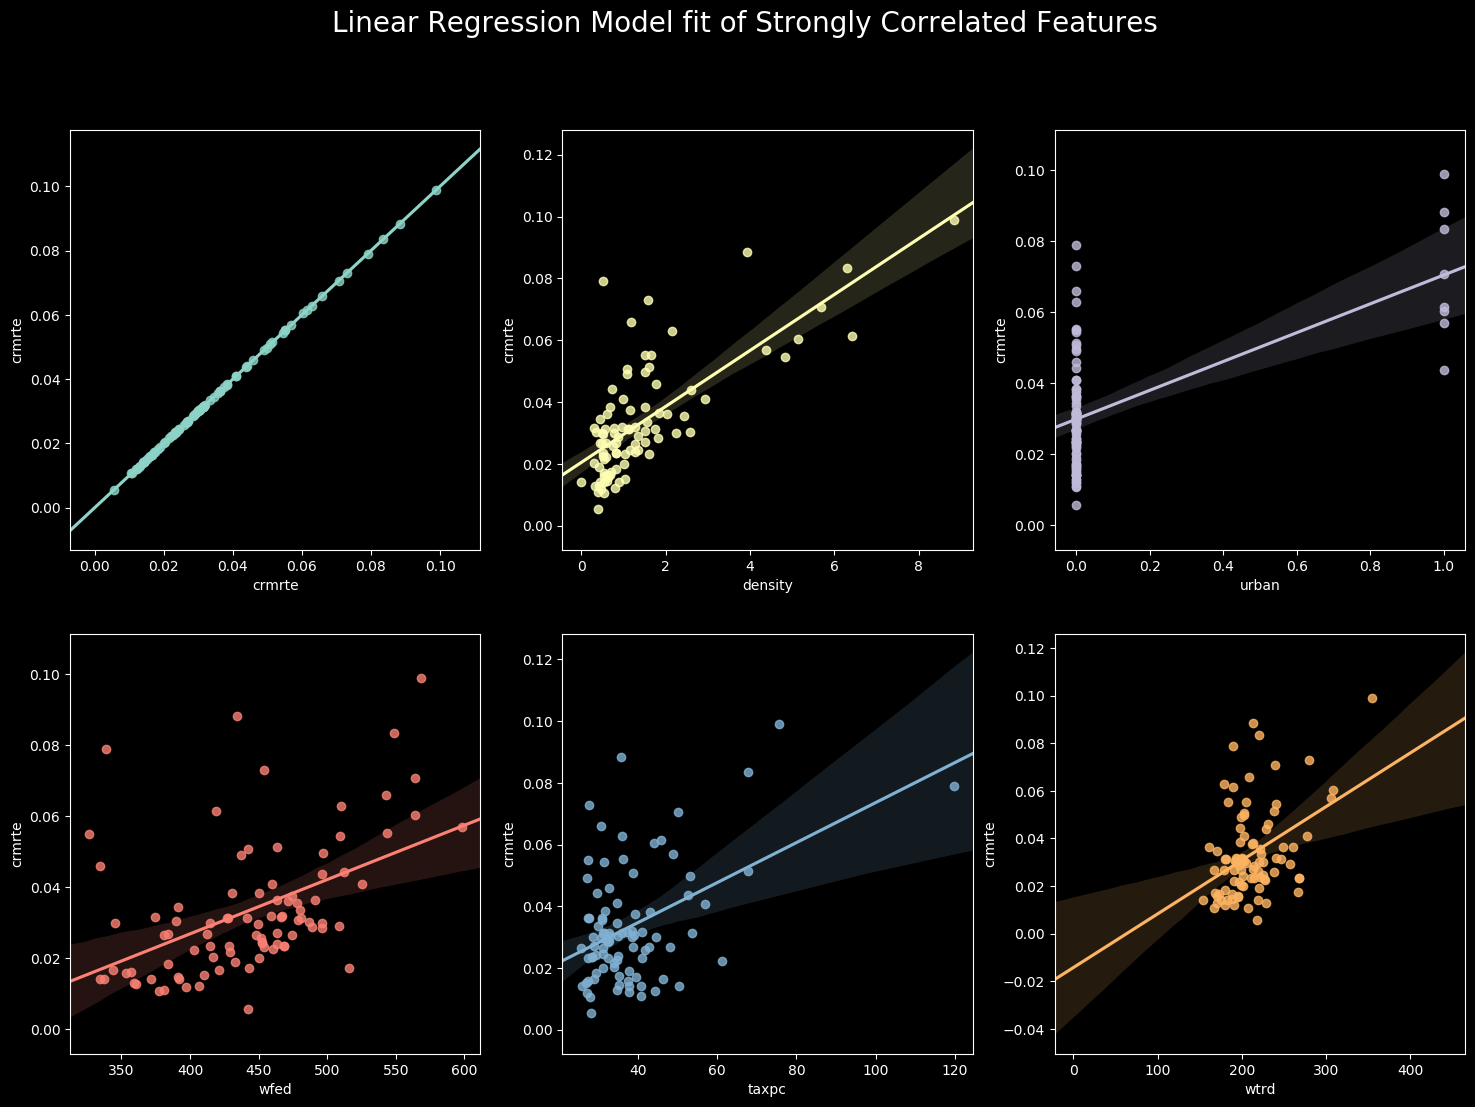

In [124]:
# To plot data and a linear regression model fit.

fig, ax = plt.subplots(round(len(selected_features_list) / 3), 3, figsize = (18, 12))

features = list(selected_features_list.index)
plt.suptitle('Linear Regression Model fit of Strongly Correlated Features', 
                                                                     fontsize=20)

for i, ax in enumerate(fig.axes):
    if i < len(features):
        sns.regplot(x=features[i],y='crmrte', 
                        data=crimeData[features], ax=ax)

## Box Plots
Let's do the box plot & violin plot for the boolean features 'west', 'central', 'urban' to find impact on crime rate, if any.

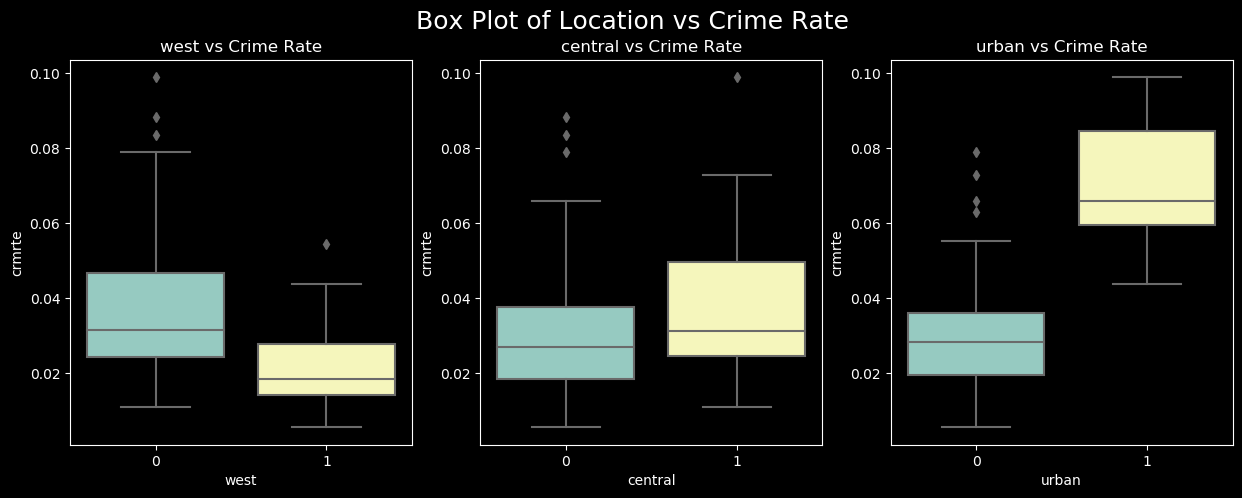

In [125]:
#Box-plot: another method of visualizing the 1-D scatter plot more intuitively.

# Categories: west, central and urban
categories = ['west', 'central', 'urban']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle('Box Plot of Location vs Crime Rate', fontsize=18)

for idx, cat in enumerate(categories):
    sns.boxplot(x=cat,y='crmrte', data=crimeData, 
                ax=axes[idx]).set_title(cat+' vs Crime Rate')
plt.show()

## Violin Plots

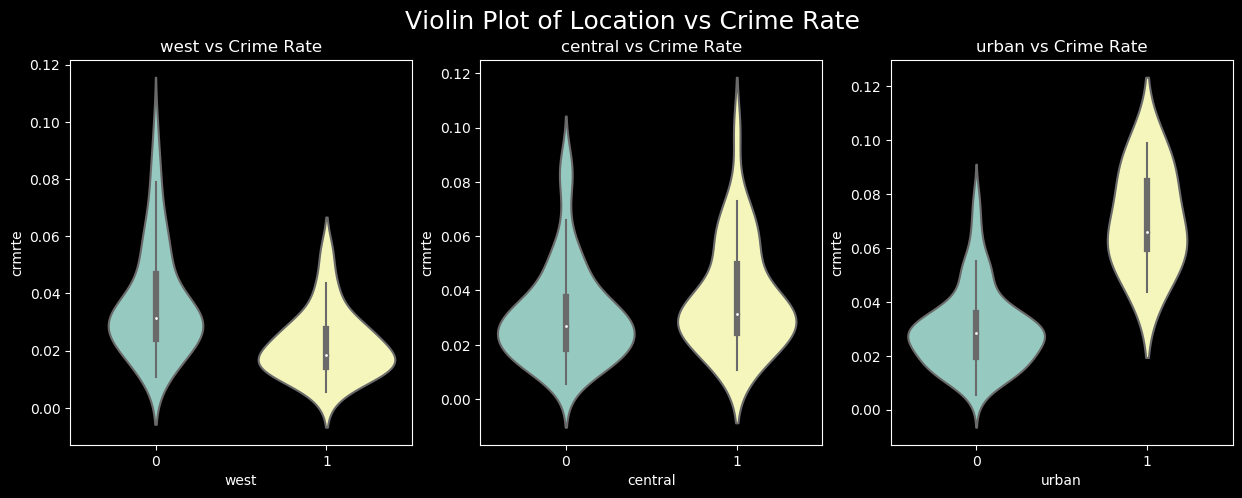

In [126]:
# A violin plot combines the benefits of the previous two plots and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner in a violin plot

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle('Violin Plot of Location vs Crime Rate', fontsize=18)

for idx, cat in enumerate(categories):
    sns.violinplot(x=cat,y='crmrte', data=crimeData, size=8, ax=axes[idx]) \
    .set_title(cat+' vs Crime Rate')
plt.show()

# Observations:

a) The crime rate in urban areas is found to be significantly high. Thus, the feature 'urban' is an useful variable for prediction.

b) The crime rate in west is found to be less and central moderate. But as there is significant overlap, such variations may not be very helpful for prediction. 

# Feature-Feature Correlation Analysis

Many times, more than one input could be dependent on each other. In Linear Regression, the requirement is that all the input variables are independent of each other. 

When a feature is dependent on one or more of the other input features, it leads to a phenomenon known as multi-collinearity. **Multi-collinearity among features can be identified by doing Feature-Feature correlation analysis.**

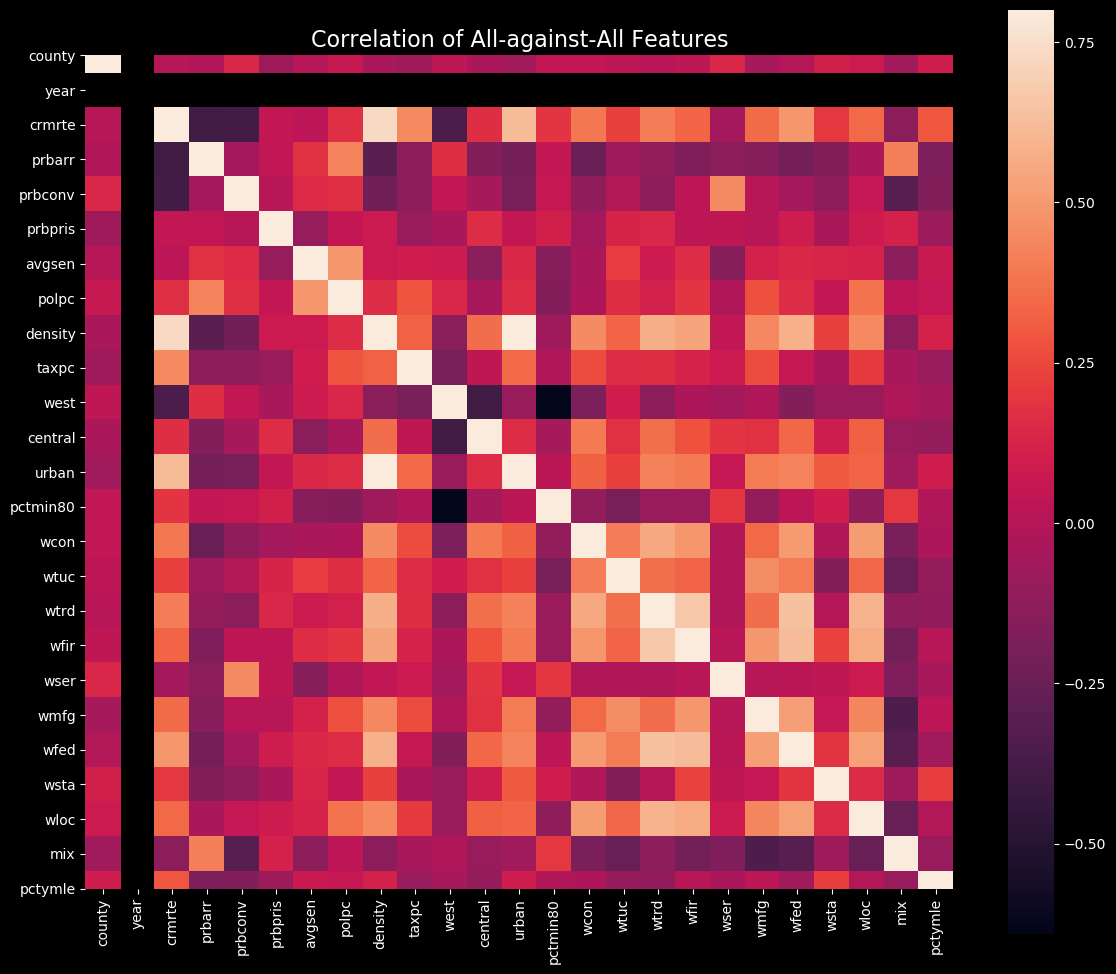

In [127]:
# Drawing a heatmap
crimeData_corr = crimeData.corr()

f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of All-against-All Features',y=1,size=16)
sns.heatmap(crimeData_corr,square = True,  vmax=0.8)

# Observations from the Feature HeatMap:
    
a) The **density and urban variable seems to be highly correlated**, which is obvious, because urban areas are densely populated.

b) **Some of the "wage features" are positively correlated**, as the wage increase/ decrease in one domain would certainly influence the other. For example, **wtrd & wfir are positively correlated to wfed & wloc. Also, wfir and wtrd have moderate correlation.**

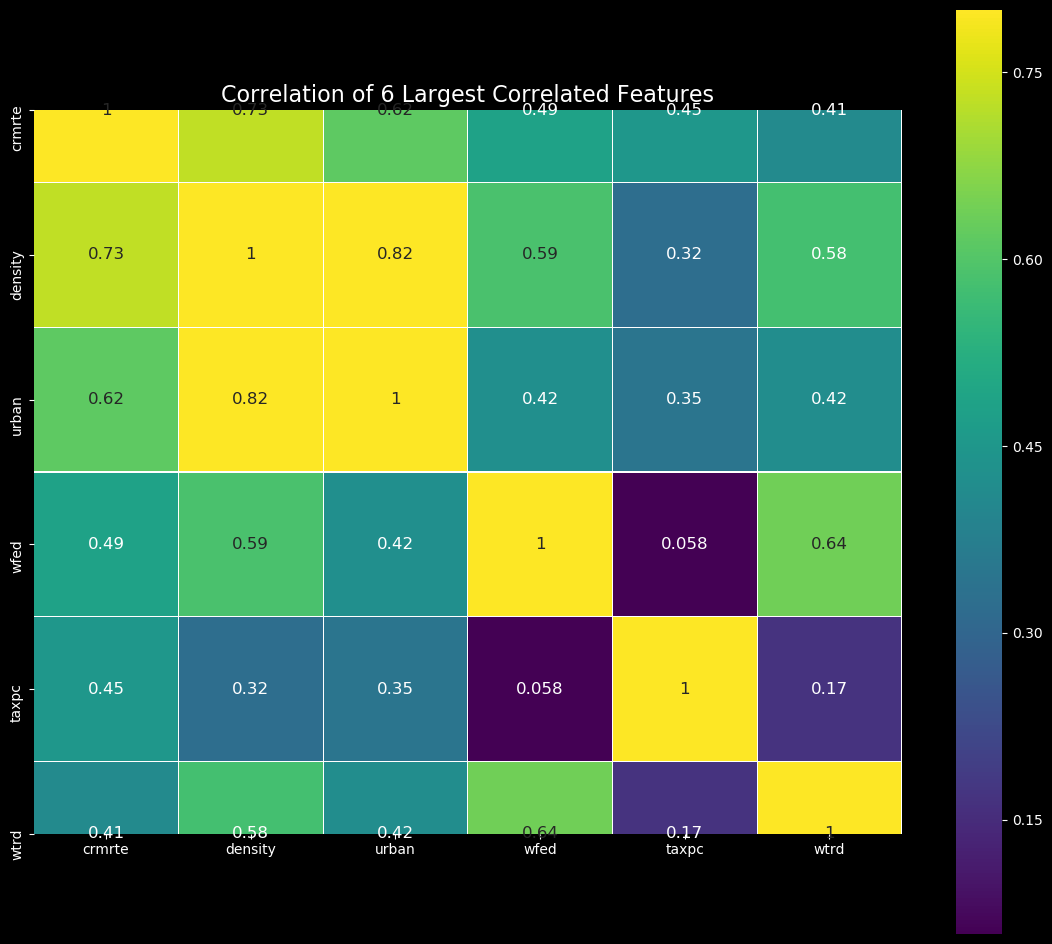

In [128]:
# Zoomed HeatMap

k= 6
cols = crimeData_corr.nlargest(k,'crmrte')['crmrte'].index
# print(cols)

cm = np.corrcoef(crimeData[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of ' + str(k) + ' Largest Correlated Features',y=1,size=16)
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,
            annot_kws = {'size':12},yticklabels = cols.values)

# Observations from Zoomed Feature HeatMap:
    
a) Density and crime rate have a correlation of 0.73. But **density has high correlation with 'urban' feature. Hence, whether both features, density and urban, are useful to predict crime rate needs further investigation. We wll use linear regression to sort out this question.**
    
b) The feature, 'urban' has a correlation of 0.62 with crime rate, but whether the correlation is because 'urban' has very high correlation with 'density' is yet to be known.
    
c) Wage columns, wfed & wtrd are positively correlated to 'density' feature. This can be intuitively understood as the weekly wages would be higher in urban areas.

# Conclusions

## Data Analysis and Cleaning

**Observations:**

**Some rows have to be dropped** before doing regression analysis. The probability values of some rows are found to be > 1 and location of one row was found to be both 'west' and 'central', at the same time. We will drop these rows before building the model. The **special character error in the input dataset is also fixed.**


## Univariate Analysis

a) The features **density, mix, police per capita, probability of conviction and tax revenue per capita seems to have similar distribution as crime rate**. But no definitive conclusion can be made from this observation. 

b) One **strange observation is in weekly wages of service industry (wser).** More than 95% of wages lies below 400, but the maximum wage is around 2250.

c) Though the maximum value of tax revenue per capita is 120, more than 50% of values lies below 40.

d) Though the maximum value of police per capita is 0.009, more than 60% of values lies below 0.001.

## Bivariate Analysis

a) Based on the pairplot, it can be noted that **density is most positively correlated with crime rate. There is also some correlation with weekly wages under different domains but it needs further investigation, as they are not so pronounced.**

b) Strangely, the **weekly wage features and crime rate is found to be slightly positively correlated. This signifies unequal distribution of income** or probability high unemployment rate. One of the most important features that is not in the given data is unemployment rate.

## Correlation among features for each boolean feature

1) Some of the correlation lines are showing upward or downward trends more than before.

2) **Probability of conviction is found to have negative correlation with crime rate in both west and central, but not in urban areas**.

3) **Tax Per capita is found to have positive correlation with crime rate in both central and urban areas**.

4) **Percentage of minority is positively correlated with crime rate, both in west and in urban areas**.

5) Thus, a combination of density and location (urban/ west/ central) can help aid crime rate prediction.

## Linear Fit of Top Correlated Features

a) The crime rate in urban areas is found to be significantly high. Thus, the feature 'urban' is an useful variable for prediction.

b) The crime rate in west is found to be less and central moderate. But as there is significant overlap, such variations may not to be very helpful for prediction.

## Feature-Feature Correlation Analysis

a) Many times, more than one input could be dependent on each other. It leads to a phenomenon known as **multi-collinearity, which can be identified by doing Feature-Feature correlation analysis.** In Linear Regression, the requirement is that all the input variables are independent of each other.

b) The **density and urban variable seems to be highly correlated**, which is obvious, because urban areas are densely populated.

c) **Some of the "wage features" are positively correlated**, as the wage increase/ decrease in one domain would certainly influence the other. For example, **wtrd & wfir are positively correlated to wfed & wloc. Also, wfir and wtrd have moderate correlation**.

d) Density and crime rate have a correlation of 0.73. But **density has high correlation with 'urban' feature. Hence, whether both features, density and urban, are useful to predict crime rate needs further investigation. We wll use linear regression to sort out this question**.

e) The feature, 'urban' has a correlation of 0.62 with crime rate, but whether the correlation is because 'urban' has very high correlation with 'density' is yet to be known.

f) Wage columns, wfed & wtrd are positively correlated to 'density' feature. This can be intuitively understood as the weekly wages would be higher in urban areas.

## Second Objective:

**To use insights from EDA to develop a suitable linear model with crmrte as the dependent variable and explain the various aspects of the model**.

## Actionable Observations from EDA

1) The **density and urban variable** has highest correlation with crime rate.

2) But, density and urban variable **seems to be highly correlated**, which is obvious, because urban areas are densely populated. Hence, there is a **high chance of multicollinearity** between density and urban features. We wll use linear regression to sort out this question.

3) The feature, 'urban' has a correlation of 0.62 with crime rate, but whether the correlation is because 'urban' has very high correlation with 'density' is yet to be known.

4) A combination of density and location (west/ central/ urban) can help aid crime rate prediction. 

5) Wage columns, wfed & wtrd are positively correlated to 'density' feature. This can be intuitively understood as the **weekly wages would be higher in urban areas.**

6) Some of the **"wage features" are positively correlated**, as the wage increase/ decrease in one domain would certainly influence the other.

7) wtrd & wfir are positively correlated to wfed & wloc. Also, wfir and wtrd have moderate correlation with each other.

8) There are **6 strongly correlated values** with Crime Rate: crmrte, density, urban, wfed, taxpc, wtrd.



# Data Cleaning on Above DataSet:

In [129]:
# This row has to be dropped because of data anomaly.
crimeData[crimeData['prbarr'] > 1]

county  year    crmrte   prbarr  prbconv  prbpris     avgsen     polpc  \
50     115    87  0.005533  1.09091      1.5      0.5  20.700001  0.009054   

     density      taxpc  ...        wtuc        wtrd        wfir        wser  \
50  0.385809  28.193104  ...  503.235077  217.490845  342.465759  245.206085   

          wmfg        wfed        wsta        wloc  mix   pctymle  
50  448.420013  442.200012  340.390015  386.119995  0.1  0.072535  

[1 rows x 25 columns]

In [130]:
# These rows has to be dropped because of data anomaly.
crimeData[crimeData['prbconv'] > 1]

county  year    crmrte    prbarr  prbconv   prbpris     avgsen     polpc  \
1        3    87  0.015253  0.132029  1.48148  0.450000   6.350000  0.000746   
9       19    87  0.022157  0.162860  1.22561  0.333333  10.340000  0.002024   
43      99    87  0.017187  0.153846  1.23438  0.556962  14.750000  0.001859   
50     115    87  0.005533  1.090910  1.50000  0.500000  20.700001  0.009054   
55     127    87  0.029150  0.179616  1.35814  0.335616  15.990000  0.001583   
60     137    87  0.012666  0.207143  1.06897  0.322581   6.180000  0.000814   
66     149    87  0.016499  0.271967  1.01538  0.227273  14.620000  0.001519   
83     185    87  0.010870  0.195266  2.12121  0.442857   5.380000  0.001222   
89     195    87  0.031397  0.201397  1.67052  0.470588  13.020000  0.004459   
90     197    87  0.014193  0.207595  1.18293  0.360825  12.230000  0.001186   

     density      taxpc  ...        wtuc        wtrd        wfir         wser  \
1   1.046332  26.892078  ...  376.254181  196.010101  258.564972   192.307693   
9   0.576744  61.152512  ...  613.226074  191.245224  290.514099   266.093414   
43  0.547862  39.573483  ...  417.209900  168.269226  301.573425   247.629089   
50  0.385809  28.193104  ...  503.235077  217.490845  342.465759   245.206085   
55  1.338889  32.023758  ...  426.390076  257.600769  441.141296   305.761169   
60  0.316716  44.293674  ...  356.125366  170.871139  170.940170   250.836121   
66  0.609244  29.034021  ...  437.062927  188.768280  353.218201   210.441483   
83  0.388759  40.824535  ...  331.564972  167.372589  264.423065  2177.068115   
89  1.745989  53.666927  ...  377.935608  246.061371  411.433014   296.868439   
90  0.889881  25.952581  ...  341.880341  182.801987  348.143250   212.820511   

          wmfg        wfed        wsta        wloc       mix   pctymle  
1   300.380005  409.829987  362.959992  301.470001  0.030227  0.082607  
9   567.059998  403.149994  258.329987  299.440002  0.053347  0.077132  
43  258.989990  442.760010  387.019989  291.440002  0.019608  0.128947  
50  448.420013  442.200012  340.390015  386.119995  0.100000  0.072535  
55  329.869995  508.609985  380.299988  329.709992  0.063055  0.074003  
60  192.960007  360.839996  283.899994  321.730011  0.068702  0.070984  
66  289.429993  421.339996  342.920013  301.230011  0.116822  0.062158  
83  247.720001  381.329987  367.250000  300.130005  0.049689  0.070082  
89  392.269989  480.790008  303.109985  337.279999  0.156124  0.079451  
90  322.920013  391.720001  385.649994  306.850006  0.067568  0.074199  

[10 rows x 25 columns]

In [131]:
# The location cannot be both west and central together.
crimeData[crimeData['west']+crimeData['central'] > 1]

county  year    crmrte    prbarr  prbconv   prbpris  avgsen    polpc  \
32      71    87  0.054406  0.243119  0.22959  0.379175   11.29  0.00207   

     density      taxpc  ...        wtuc        wtrd        wfir        wser  \
32  4.834734  31.536579  ...  595.371948  240.367325  348.025391  295.230072   

          wmfg        wfed        wsta        wloc       mix  pctymle  
32  358.950012  509.429993  359.109985  339.579987  0.101861  0.07939  

[1 rows x 25 columns]

# Observations:

From above analysis, it is found, that **some rows have to be dropped** before doing regression analysis. The probability values of some rows are found to be > 1 and location of one row was found to be both 'west' and 'central' at the same time. We will drop these rows before building the model. The **special character error in the input dataset is also fixed.**

In [132]:
# Data Cleaning based on EDA 
# Last row with special character fixed in input data.

# Removing the wage outlier row based on observation from EDA
crimeData = crimeData[crimeData.county != 185] # very high wser & prob of conviction
crimeData = crimeData[crimeData.county != 115] # prob of arrest > 1

# Removing rows with probability of arrest and conviction > 1
crimeData = crimeData[crimeData['prbarr'] < 1]
crimeData = crimeData[crimeData['prbconv'] < 1]

# The location cannot be both west and central together.
crimeData = crimeData[crimeData['west']+crimeData['central'] <= 1]

# dropping the Year column as it doesnt help in prediction
crimeData = crimeData.drop('year', axis=1)

# (Q) how many after deletion?
print (crimeData.shape)

(80, 24)


# Evaluate Observations using Linear Regression Model

Lets evaluate the above observations by building Linear Regression Models, as it helps to understand the relation between variables better.

## Creating Model with Most Correlated Feature

In [133]:
import statsmodels.api as sm

y = crimeData['crmrte']
# X = crimeData.drop('crmrte', axis=1)
X = crimeData['density']

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()
# predictions = model.predict(X) # make the predictions by the model

density_pvalue = model.pvalues['density']

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     85.18
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           3.88e-14
Time:                        19:34:19   Log-Likelihood:                 234.23
No. Observations:                  80   AIC:                            -464.5
Df Residuals:                      78   BIC:                            -459.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0222      0.002     10.949      0.000       0.018       0.026
density        0.0088      0.001      9.229      0.000       0.007       0.011
==============================================================================
Omnibus:                       31.606   Durbin-Watson:                   2.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.597
Skew:                           1.517   Prob(JB):                     3.11e-13
Kurtosis:                       5.841   Cond. No.                         3.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Observations:

a) As the p-value of density is 0 (small), the changes in crime rate has got close relation with changes in density.

b) R-squared value is found to be 0.525 with only density as predictor variable. This means that 52.5% variability of crime rate is explained by density feature.

c) Co-effient estimate of 0.0086 indicates one value increase of density would cause 0.0086 value increase in crime rate.

## Creating Model with Top 2 Correlated Features:

In [134]:
y = crimeData['crmrte']
# X = crimeData.drop('crmrte', axis=1)
# X = crimeData[('density', 'urban')]
X = crimeData[['density', 'urban']]

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()

density_pvalue_upd = model.pvalues['density']
print('Difference in P-Value = ' + str(density_pvalue_upd - density_pvalue))

# Print out the statistics
model.summary()


Difference in P-Value = 2.2791391426354033e-05


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     42.12
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           4.38e-13
Time:                        19:34:19   Log-Likelihood:                 234.27
No. Observations:                  80   AIC:                            -462.5
Df Residuals:                      77   BIC:                            -455.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0226      0.002      9.170      0.000       0.018       0.027
density        0.0084      0.002      4.511      0.000       0.005       0.012
urban          0.0026      0.010      0.277      0.783      -0.016       0.022
==============================================================================
Omnibus:                       31.413   Durbin-Watson:                   2.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.769
Skew:                           1.514   Prob(JB):                     4.71e-13
Kurtosis:                       5.804   Cond. No.                         14.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Observations:

a) **R-squared value is found to be slightly higher (0.527)** when the variable, 'urban' is coupled with density as predictor variables. But, R Squared always goes up when you add more variables regardless of whether the added variable help in prediction or not.

b)  Adjusted R Squared, penalizes for adding more variables. Thus, it can go down when you add variables that don’t contribute. Here note that, **Adjusted R-squared value has gone down from 0.519 to 0.514. Also, the AIC value is increased from -470 to -469** (the smaller the AIC value, the better the model is).

c) It has been noticed that the **p-value of 'density' feature has been increased slightly.** 

Thus, **the model has become more less reliable to explain crime rate**, because the feature 'urban' doesnt contribute to prediction. The confusion about the correlation between 'urban' and 'density' variable during EDA step, has been sorted out.

**Note:** If we add variables that are not meaningful as predictor, then it **would cause 'Overfitting'.** Then, prediction model would perform great with the training data but not with the real world data.

# Multiple Linear Regression

## Model with all Features

In [135]:
y = crimeData['crmrte']
X = crimeData.drop('crmrte', axis=1)

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()
# density_pvalue = model.pvalues

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     20.94
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           9.21e-20
Time:                        19:34:19   Log-Likelihood:                 295.18
No. Observations:                  80   AIC:                            -542.4
Df Residuals:                      56   BIC:                            -485.2
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0120      0.018      0.660      0.512      -0.024       0.048
county      2.584e-06   1.54e-05      0.168      0.867   -2.82e-05    3.33e-05
prbarr        -0.0522      0.010     -5.093      0.000      -0.073      -0.032
prbconv       -0.0073      0.006     -1.179      0.243      -0.020       0.005
prbpris        0.0110      0.012      0.890      0.377      -0.014       0.036
avgsen        -0.0008      0.000     -2.005      0.050      -0.002   -6.38e-07
polpc         10.7921      2.617      4.123      0.000       5.549      16.036
density        0.0049      0.001      3.523      0.001       0.002       0.008
taxpc          0.0002      0.000      1.918      0.060   -8.89e-06       0.000
west          -0.0051      0.004     -1.205      0.233      -0.014       0.003
central       -0.0063      0.003     -2.320      0.024      -0.012      -0.001
urban          0.0035      0.006      0.558      0.579      -0.009       0.016
pctmin80       0.0003   9.37e-05      2.877      0.006    8.19e-05       0.000
wcon        3.108e-05   2.67e-05      1.164      0.249   -2.24e-05    8.46e-05
wtuc        1.281e-05   1.52e-05      0.842      0.403   -1.77e-05    4.33e-05
wtrd        5.237e-05    4.2e-05      1.248      0.217   -3.17e-05       0.000
wfir       -4.966e-05    2.8e-05     -1.774      0.081      -0.000    6.41e-06
wser       -8.336e-05   3.05e-05     -2.729      0.008      -0.000   -2.22e-05
wmfg       -2.522e-06   1.35e-05     -0.186      0.853   -2.96e-05    2.46e-05
wfed        3.817e-05    2.5e-05      1.527      0.132   -1.19e-05    8.82e-05
wsta       -5.022e-05   2.42e-05     -2.074      0.043   -9.87e-05   -1.71e-06
wloc        4.453e-05   4.51e-05      0.987      0.328   -4.58e-05       0.000
mix           -0.0228      0.014     -1.632      0.108      -0.051       0.005
pctymle        0.1447      0.044      3.261      0.002       0.056       0.234
==============================================================================
Omnibus:                        6.753   Durbin-Watson:                   2.494
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.098
Skew:                           0.639   Prob(JB):                       0.0474
Kurtosis:                       3.443   Cond. No.                     3.28e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:
y = crimeData['crmrte']

# Feature 'urban' is found to be worsen the model as per above analysis.
# Intuitively county shouldnt contribute prediction and also p value is high.
X = crimeData.drop(['crmrte', 'urban', 'county'], axis=1)

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     23.60
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           4.53e-21
Time:                        19:34:19   Log-Likelihood:                 294.95
No. Observations:                  80   AIC:                            -545.9
Df Residuals:                      58   BIC:                            -493.5
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0099      0.017      0.568      0.572      -0.025       0.045
prbarr        -0.0524      0.010     -5.197      0.000      -0.073      -0.032
prbconv       -0.0076      0.006     -1.240      0.220      -0.020       0.005
prbpris        0.0104      0.012      0.862      0.392      -0.014       0.035
avgsen        -0.0008      0.000     -2.011      0.049      -0.002   -3.73e-06
polpc         10.6581      2.557      4.168      0.000       5.540      15.776
density        0.0055      0.001      6.517      0.000       0.004       0.007
taxpc          0.0002      0.000      2.012      0.049     1.1e-06       0.000
west          -0.0045      0.004     -1.108      0.272      -0.013       0.004
central       -0.0062      0.003     -2.343      0.023      -0.012      -0.001
pctmin80       0.0003   8.82e-05      3.231      0.002       0.000       0.000
wcon         3.12e-05   2.63e-05      1.186      0.240   -2.15e-05    8.39e-05
wtuc        1.339e-05   1.45e-05      0.924      0.359   -1.56e-05    4.24e-05
wtrd        5.361e-05    4.1e-05      1.308      0.196   -2.84e-05       0.000
wfir       -5.175e-05   2.73e-05     -1.899      0.063      -0.000    2.81e-06
wser       -8.318e-05   2.96e-05     -2.809      0.007      -0.000   -2.39e-05
wmfg       -1.573e-06   1.32e-05     -0.119      0.906    -2.8e-05    2.49e-05
wfed        3.676e-05   2.45e-05      1.500      0.139   -1.23e-05    8.58e-05
wsta       -4.646e-05   2.28e-05     -2.034      0.047   -9.22e-05   -7.44e-07
wloc        4.501e-05   4.44e-05      1.014      0.315   -4.39e-05       0.000
mix           -0.0223      0.014     -1.628      0.109      -0.050       0.005
pctymle        0.1439      0.043      3.330      0.002       0.057       0.230
==============================================================================
Omnibus:                        6.849   Durbin-Watson:                   2.503
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.210
Skew:                           0.646   Prob(JB):                       0.0448
Kurtosis:                       3.438   Cond. No.                     3.24e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Removing features from all-feature Model

# Interim Observations:

a) **Adj. R-squared improved** from 0.825 in all-feature model to 0.830, after removal of 2 features 'urban', 'county'.

b) **AIC value decreased** from -591.3 in all-feature model to -595.2, after removal of 2 features 'urban', 'county'.

Thus, **we have a better model than the all-feature model.** We will try to remove more features and analyze the model indicators.

In [137]:
y = crimeData['crmrte']
# Features are dropped based on p-value, R-Squared and AIC figures.
X = crimeData.drop(['crmrte', 'urban', 'county', 
                    'wmfg', 'prbpris', 'wloc', 'west', 'wtuc'], axis=1)

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     30.98
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           8.65e-24
Time:                        19:34:20   Log-Likelihood:                 292.00
No. Observations:                  80   AIC:                            -550.0
Df Residuals:                      63   BIC:                            -509.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0213      0.015      1.444      0.154      -0.008       0.051
prbarr        -0.0567      0.010     -5.893      0.000      -0.076      -0.037
prbconv       -0.0090      0.006     -1.501      0.138      -0.021       0.003
avgsen        -0.0007      0.000     -1.912      0.060      -0.001    3.15e-05
polpc          9.7105      2.378      4.083      0.000       4.958      14.463
density        0.0055      0.001      6.629      0.000       0.004       0.007
taxpc          0.0002   9.28e-05      2.657      0.010    6.11e-05       0.000
central       -0.0039      0.002     -2.058      0.044      -0.008      -0.000
pctmin80       0.0004   5.56e-05      6.573      0.000       0.000       0.000
wcon        4.224e-05   2.36e-05      1.786      0.079   -5.01e-06    8.95e-05
wtrd        6.553e-05   3.84e-05      1.705      0.093   -1.13e-05       0.000
wfir       -5.353e-05   2.64e-05     -2.028      0.047      -0.000   -7.86e-07
wser       -7.792e-05   2.82e-05     -2.768      0.007      -0.000   -2.17e-05
wfed        4.205e-05   2.35e-05      1.789      0.078   -4.91e-06     8.9e-05
wsta       -4.664e-05   2.18e-05     -2.136      0.037   -9.03e-05   -3.01e-06
mix           -0.0224      0.013     -1.697      0.095      -0.049       0.004
pctymle        0.1471      0.041      3.583      0.001       0.065       0.229
==============================================================================
Omnibus:                        3.198   Durbin-Watson:                   2.571
Prob(Omnibus):                  0.202   Jarque-Bera (JB):                2.731
Skew:                           0.450   Prob(JB):                        0.255
Kurtosis:                       3.089   Cond. No.                     2.39e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Observations:

a) **Adj. R-squared of the above model with 8 features dropped is better** than the all-feature model.

b) **AIC value of the above model is better** than the all-feature model.

**Thus, we have a better model than the all-feature model** by removing more features such as 'wmfg', 'prbpris', 'wloc', 'west', 'wtuc'. We will try to remove even more features with p > 0.05 and evaluate using RMSE. 

# Model Evaluation Using Cross Validation & RMSE

We will test the change in RMSE value when the features with p > 0.05 are removed. The features with p > 0.05 are prbconv, mix, wfed, wtrd, wcon & avgsen. We will also check the RMSE values for the features removed in the previous model.

In [138]:
from sklearn.model_selection import train_test_split
def calculateRMSE(X, y, feature='None'):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    # Instantiate and fit the model
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    y_pred = lm.predict(X_test)

    RMSE = str(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
    # RMSE
    print("RMSE with " + feature + " removed = " + RMSE)
    return RMSE

RMSE with None removed = 0.010075406096347682
RMSE with wmfg removed = 0.010060071879713044
RMSE with prbpris removed = 0.010147454018421329
RMSE with wloc removed = 0.010071614796902049
RMSE with west removed = 0.010318153302733984
RMSE with wtuc removed = 0.01012040955372574
RMSE with prbconv removed = 0.010164979560176745
RMSE with mix removed = 0.010329179206216376
RMSE with wfed removed = 0.01051409130616445
RMSE with wtrd removed = 0.010129324432400472
RMSE with wcon removed = 0.009752796976385886
RMSE with avgsen removed = 0.010447795436725468


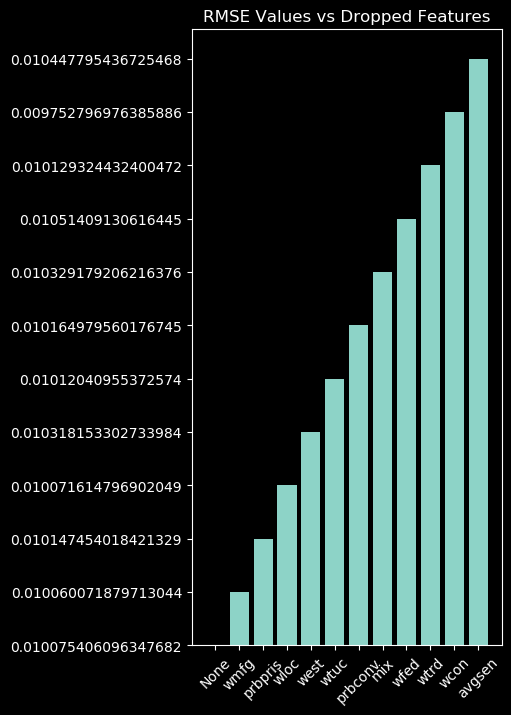

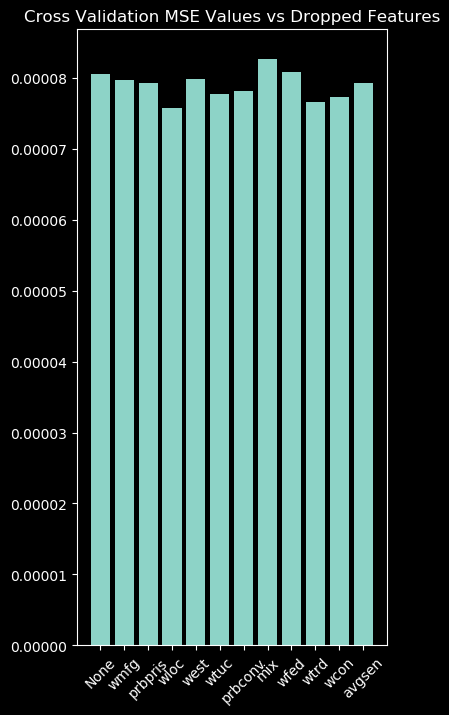

In [139]:
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score
rmseVals = []
cv_scores = []
droppedFeatures = []

# Features are dropped based on p-value, R-Squared and AIC figures.
features2Drop = ['crmrte', 'urban', 'county']

y = crimeData['crmrte']
X = crimeData.drop(features2Drop, axis=1)

rmseVals.append(calculateRMSE(X, y))
droppedFeatures.append('None')
scores = cross_val_score(LinearRegression(), 
                         X, y, cv=10, scoring='neg_mean_squared_error')
cv_scores.append(-1*scores.mean())

# 'wmfg', 'prbpris', 'wloc', 'west', 'wtuc' are dropped in the previous model
features2Test = ['wmfg', 'prbpris', 'wloc', 'west', 'wtuc', 
                 'prbconv', 'mix', 'wfed', 'wtrd', 'wcon', 'avgsen']

for feature in features2Test:
    features2Drop.append(feature)
    X = crimeData.drop(features2Drop, axis=1)
    features2Drop.remove(feature)
    rmseVals.append(calculateRMSE(X, y, feature))
    droppedFeatures.append(feature)

    scores = cross_val_score(LinearRegression(), 
                             X, y, cv=10, scoring='neg_mean_squared_error')
    cv_scores.append(-1*scores.mean())
        
# print(droppedFeatures)
# print(cv_scores)

plt.bar(droppedFeatures, rmseVals)
plt.title('RMSE Values vs Dropped Features')
plt.xticks(rotation=45)
plt.show()

plt.bar(droppedFeatures, cv_scores)
plt.title('Cross Validation MSE Values vs Dropped Features')
plt.xticks(rotation=45)
plt.show()


From the bar chart, the RMSE values performs better than 'None' when wtuc, wtrd, wloc, west, wmfg and avgsen are removed. Thus, in addition to the previous model, **wtrd & avgsen features are removed.** But the R-squared and AIC figures degrade when both the features are removed. Since wtrd has a higher p value, **we will remove wtrd in our model.**

The lowest cross validation MSE is for wloc, wtrd, prbconv and wcon. Thus, in addition to the previous exclusions, prbconv & wcon also can be dropped. But removal of either feature would increase the RMSE value as per the above plot. Thus, we will remove only wtrd in our model.

# OLS Regression Characteristic of Final Model

In [140]:
y = crimeData['crmrte']
# Features are dropped based on p-value, R-Squared and AIC figures.
X = crimeData.drop(['crmrte', 'urban', 'county', 
                    'wmfg', 'prbpris', 'wloc', 
                    'west', 'wtuc', 'wtrd'], axis=1)

# without a constant we are forcing our model to go through the origin
X = sm.add_constant(X) # To add an intercept to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 crmrte   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     31.90
Date:                Fri, 17 Apr 2020   Prob (F-statistic):           5.95e-24
Time:                        19:34:21   Log-Likelihood:                 290.20
No. Observations:                  80   AIC:                            -548.4
Df Residuals:                      64   BIC:                            -510.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0273      0.015      1.875      0.065      -0.002       0.056
prbarr        -0.0565      0.010     -5.786      0.000      -0.076      -0.037
prbconv       -0.0113      0.006     -1.909      0.061      -0.023       0.001
avgsen        -0.0007      0.000     -1.773      0.081      -0.001     8.3e-05
polpc          8.7668      2.347      3.735      0.000       4.078      13.455
density        0.0057      0.001      6.946      0.000       0.004       0.007
taxpc          0.0003   9.39e-05      2.735      0.008    6.93e-05       0.000
central       -0.0037      0.002     -1.896      0.062      -0.008       0.000
pctmin80       0.0004   5.63e-05      6.381      0.000       0.000       0.000
wcon        4.943e-05   2.36e-05      2.094      0.040    2.27e-06    9.66e-05
wfir       -3.692e-05   2.49e-05     -1.483      0.143   -8.67e-05    1.28e-05
wser       -7.727e-05   2.86e-05     -2.705      0.009      -0.000   -2.02e-05
wfed        5.208e-05   2.31e-05      2.256      0.028    5.96e-06    9.82e-05
wsta       -5.317e-05   2.18e-05     -2.438      0.018   -9.67e-05    -9.6e-06
mix           -0.0207      0.013     -1.550      0.126      -0.047       0.006
pctymle        0.1404      0.041      3.386      0.001       0.058       0.223
==============================================================================
Omnibus:                        7.285   Durbin-Watson:                   2.498
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                6.695
Skew:                           0.608   Prob(JB):                       0.0352
Kurtosis:                       3.727   Cond. No.                     2.24e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Testing the Model on Input Data

In [141]:
# To calculate Linear Regression, do plotting and calculate error

# Importing the statistics module
from statistics import mean
from statistics import median

# used to format headings 
bold = '\033[1m'
end = '\033[0m'

def linearReg(x_train, y_train, x_test, y_test):
    
    lm = LinearRegression()
    lm.fit(x_train, y_train)

    y_pred = lm.predict(x_test)

    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Crime Rate: $Y_i$")
    plt.ylabel("Predicted Crime Rate: $\hat{Y}_i$")
    plt.title("Actual Crime Rate vs Predicted Crime Rate: $Y_i$ vs $\hat{Y}_i$")
    plt.show()
    
    # calculate MAE, MSE, RMSE
    print("Mean Absolute Error (MAE) = " + str(
                metrics.mean_absolute_error(y_test, y_pred)))
    print("Median Squared Error (MSE) = " + str(
                metrics.mean_squared_error(y_test, y_pred)))
    print("Root Mean Squared Error (RMSE) = " + str(
                np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    
    print("Explained Variance = " + str(
                    metrics.explained_variance_score(y_test, y_pred)))

    # Calculating the error
    delta_y = y_test - y_pred;
    print("Median Absolute Error = " + str(median(abs(delta_y))))

Train Data Shape:
(56, 14) (56,)
Test Data Shape:
(24, 14) (24,)


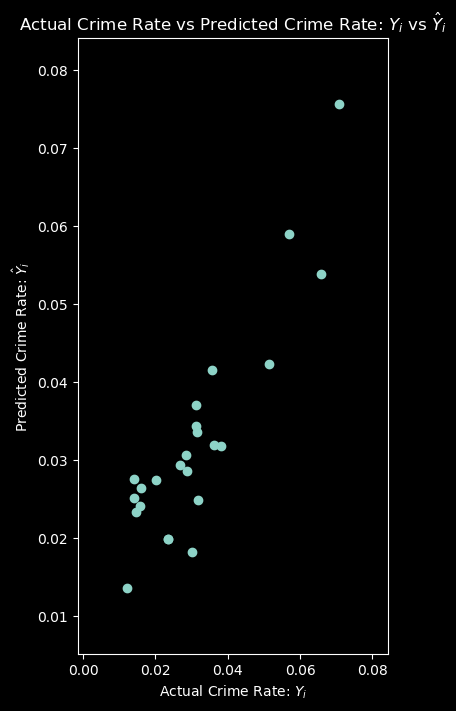

Mean Absolute Error (MAE) = 0.0061545656363312315
Median Squared Error (MSE) = 5.170748156116874e-05
Root Mean Squared Error (RMSE) = 0.007190791441918528
Explained Variance = 0.7971447385431107
Median Absolute Error = 0.005936349456314752


In [142]:
from sklearn.model_selection import train_test_split
y = crimeData['crmrte']
X = crimeData.drop(['crmrte', 'urban', 'county', 
                    'wmfg', 'prbpris', 'wloc', 
                    'west', 'wtuc', 'wtrd', 'wcon'], axis=1)

# create training and testing data: 70/ 30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print('Train Data Shape:')
print(X_train.shape, y_train.shape)
print('Test Data Shape:')
print(X_test.shape, y_test.shape)

linearReg(X_train, y_train, X_test, y_test)


# **Conclusion**

a) **The Actual vs Predicted plot is linear. This signifies the prediction is working fine.** The input data set is limited. With more data, the plot could be more linear.

b) As an improvement, we can **combine the boolean features**: west, central and urban into a single feature with categorical values 1, 2 & 3. Such a single feature may be more helpful to aid prediction. **Functional-transforms** (like log) on features can also be helpful.

c) **Standardization** was not found to help model performance. Still it is advisable to standardisation in linear models.

c) If there is a chance to add features, then **it might be helpful to get 'unemployment rate'** as a predictor for crime rate. 

# Third Objective:

# In this Section we are trying to plot the data set to help Police Department during Petroling:

# About DataSet:
**We are here using  Sanfranciso Crime Dataset**

# Loading data:

In [143]:
crimeData1 = pd.read_csv('crime1.csv')
print (crimeData1.shape) #shape of my dataset
crimeData1.head() #printing first five rows

(150500, 13)


IncidntNum      Category                                        Descript  \
0   120058272   WEAPON LAWS                       POSS OF PROHIBITED WEAPON   
1   120058272   WEAPON LAWS  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE   
2   141059263      WARRANTS                                  WARRANT ARREST   
3   160013662  NON-CRIMINAL                                   LOST PROPERTY   
4   160002740  NON-CRIMINAL                                   LOST PROPERTY   

  DayOfWeek                    Date   Time  PdDistrict      Resolution  \
0    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
1    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
2    Monday  04/25/2016 12:00:00 AM  14:59     BAYVIEW  ARREST, BOOKED   
3   Tuesday  01/05/2016 12:00:00 AM  23:50  TENDERLOIN            NONE   
4    Friday  01/01/2016 12:00:00 AM  00:30     MISSION            NONE   

                  Address           X          Y  \
0  800 Block of BRYANT ST -122.403405  37.775421   
1  800 Block of BRYANT ST -122.403405  37.775421   
2   KEITH ST / SHAFTER AV -122.388856  37.729981   
3  JONES ST / OFARRELL ST -122.412971  37.785788   
4    16TH ST / MISSION ST -122.419672  37.765050   

                                Location            PdId  
0   (37.775420706711, -122.403404791479)  12005827212120  
1   (37.775420706711, -122.403404791479)  12005827212168  
2  (37.7299809672996, -122.388856204292)  14105926363010  
3  (37.7857883766888, -122.412970537591)  16001366271000  
4  (37.7650501214668, -122.419671780296)  16000274071000

# Data Cleaning:

In [144]:
crimeData1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 13 columns):
IncidntNum    150500 non-null int64
Category      150500 non-null object
Descript      150500 non-null object
DayOfWeek     150500 non-null object
Date          150500 non-null object
Time          150500 non-null object
PdDistrict    150499 non-null object
Resolution    150500 non-null object
Address       150500 non-null object
X             150500 non-null float64
Y             150500 non-null float64
Location      150500 non-null object
PdId          150500 non-null int64
dtypes: float64(2), int64(2), object(9)
memory usage: 14.9+ MB


In [145]:
crimeData1.isnull().sum()

IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
Time          0
PdDistrict    1
Resolution    0
Address       0
X             0
Y             0
Location      0
PdId          0
dtype: int64

# Observation:
**We did't have to do data cleaning here as everything look good**

# Different type of crime affecting the city:


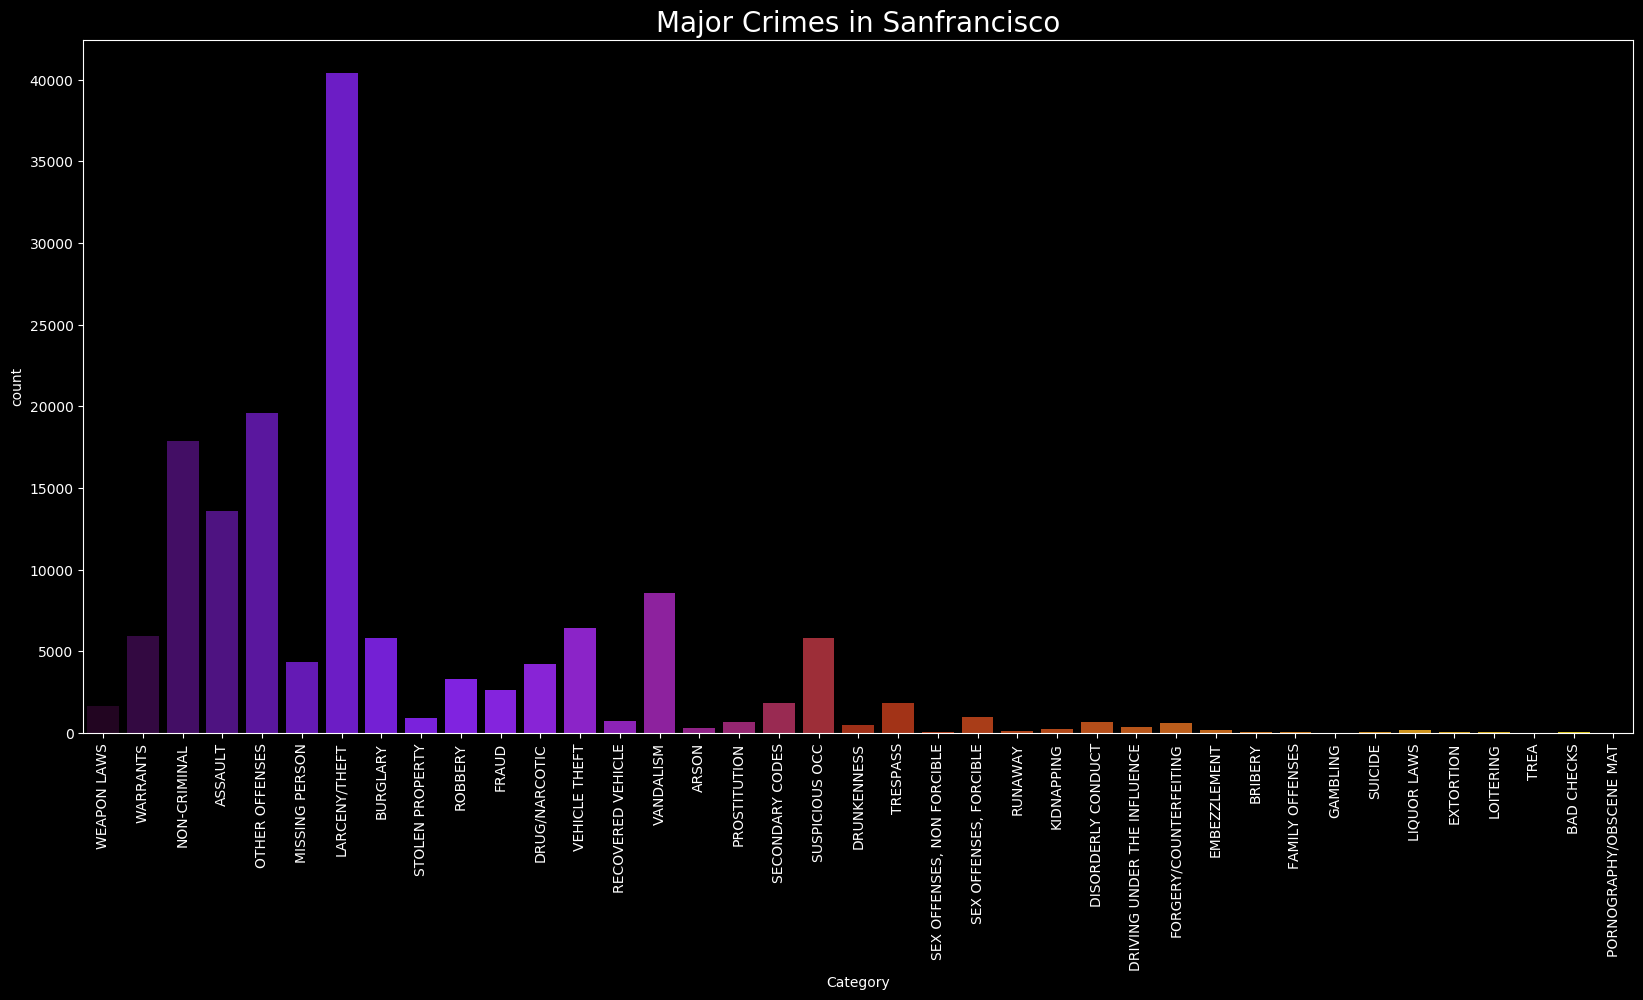

In [146]:
plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('dark_background')

sns.countplot(crimeData1['Category'], palette = 'gnuplot')

plt.title('Major Crimes in Sanfrancisco', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

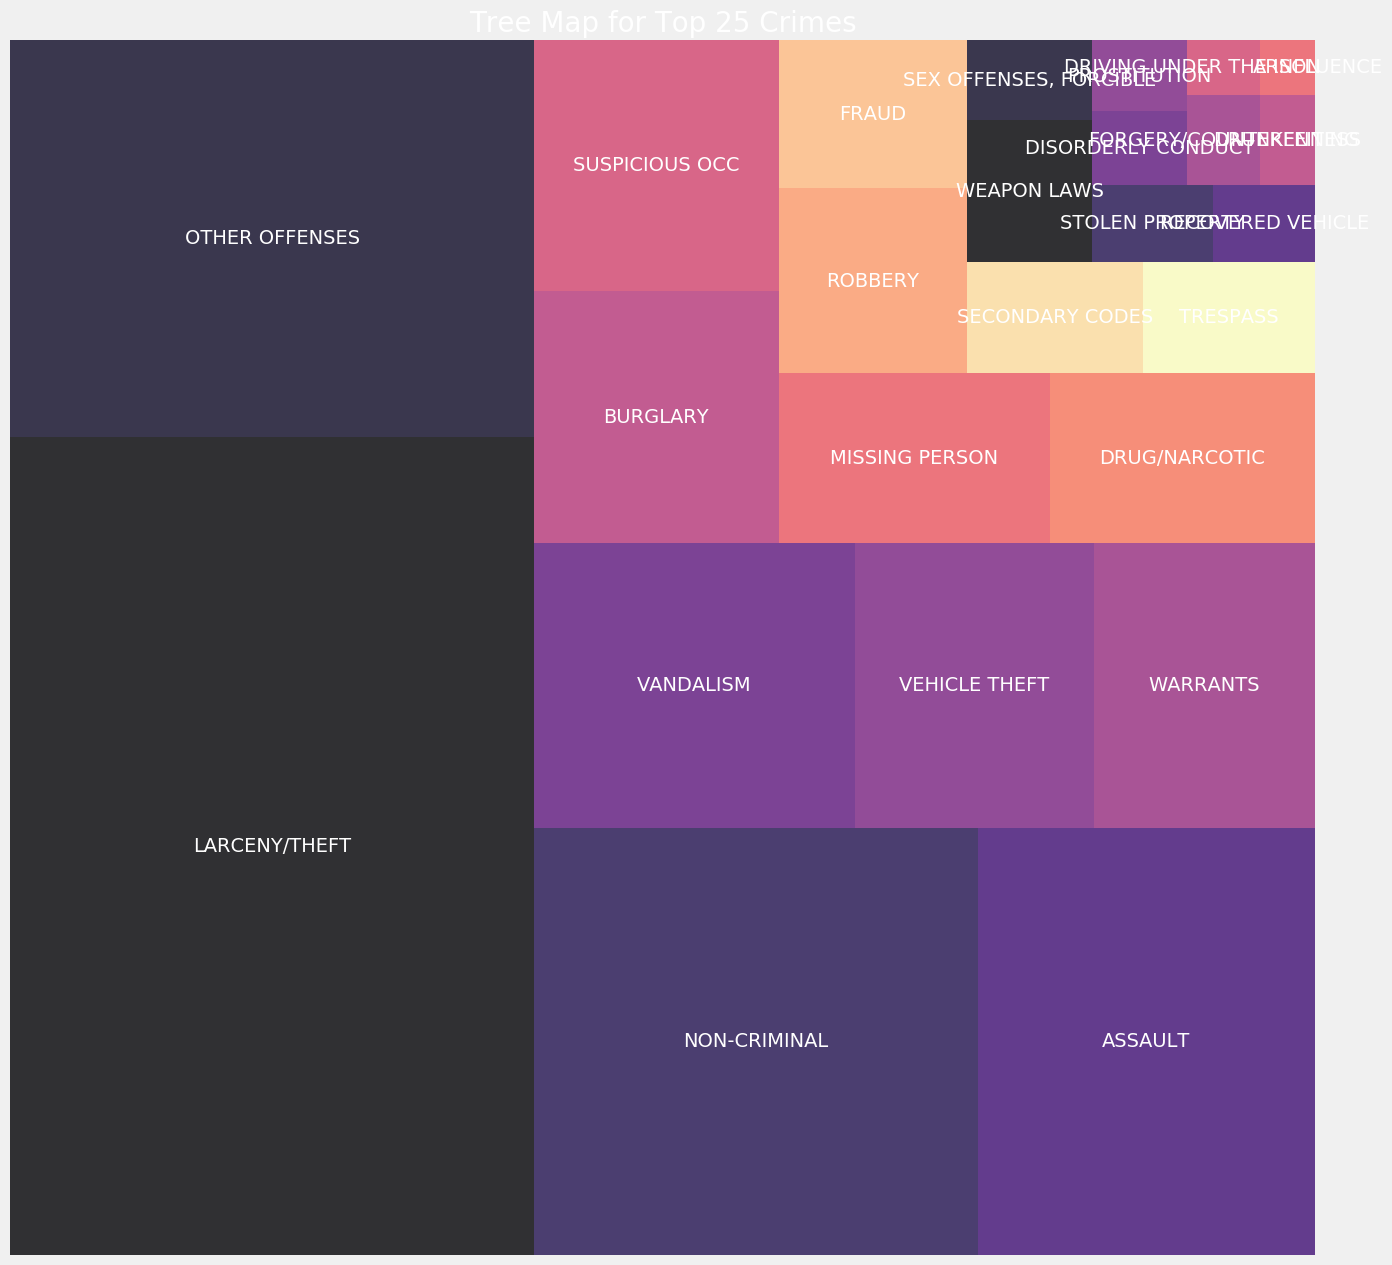

In [147]:
# plotting a tree map
y = crimeData1['Category'].value_counts().head(25)
    
plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fivethirtyeight')

color = plt.cm.magma(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Top 25 Crimes', fontsize = 20)

plt.axis('off')
plt.show()

# Observation:
 a) Latceny/Theft , Non-Criminal, Assault are the most dominating crime that we have to take care.
 
 b) But we to be more focused on crime like Assault, Drugs/Narcotics, Sex Offence as they are issues that need to solve soon.

# **Dividing city into  regons with crime count so that police can focus on more crime affecting regions**

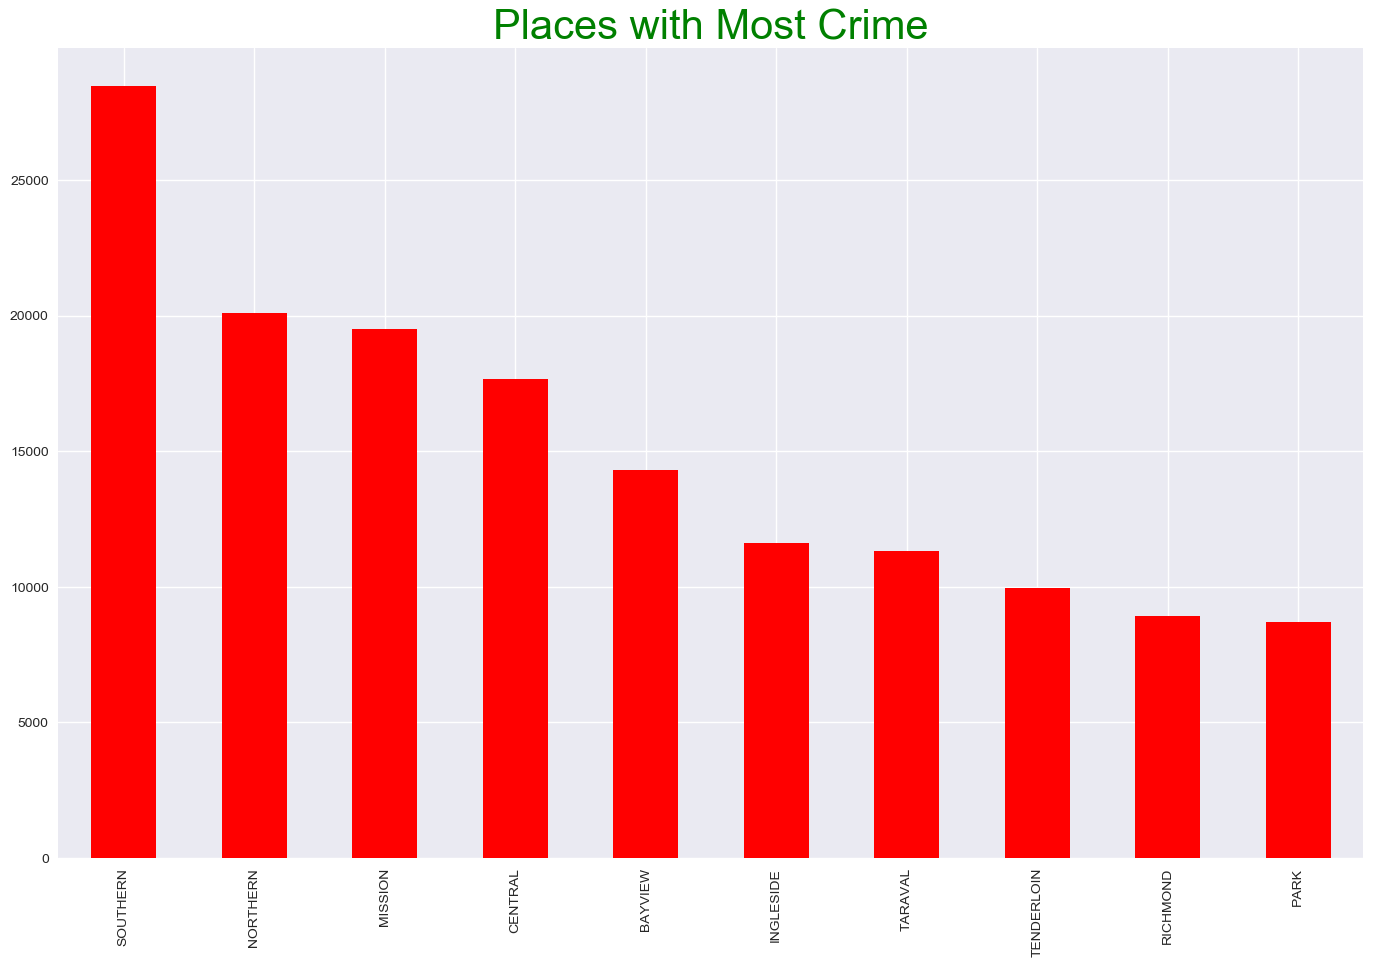

In [148]:
# Regions with count of crimes

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('seaborn')

color = plt.cm.spring(np.linspace(0, 1, 15))
crimeData1['PdDistrict'].value_counts().plot.bar(color = 'r', figsize = (15, 10))

plt.title('Places with Most Crime',fontsize = 30,color='g')

plt.xticks(rotation = 90)
plt.show()

# Observation:
**Southerrn, Northern, Mission are the three most crime affectiong areas.**

# Top 15 Addresses in Sanfrancisco with most Crime Case:

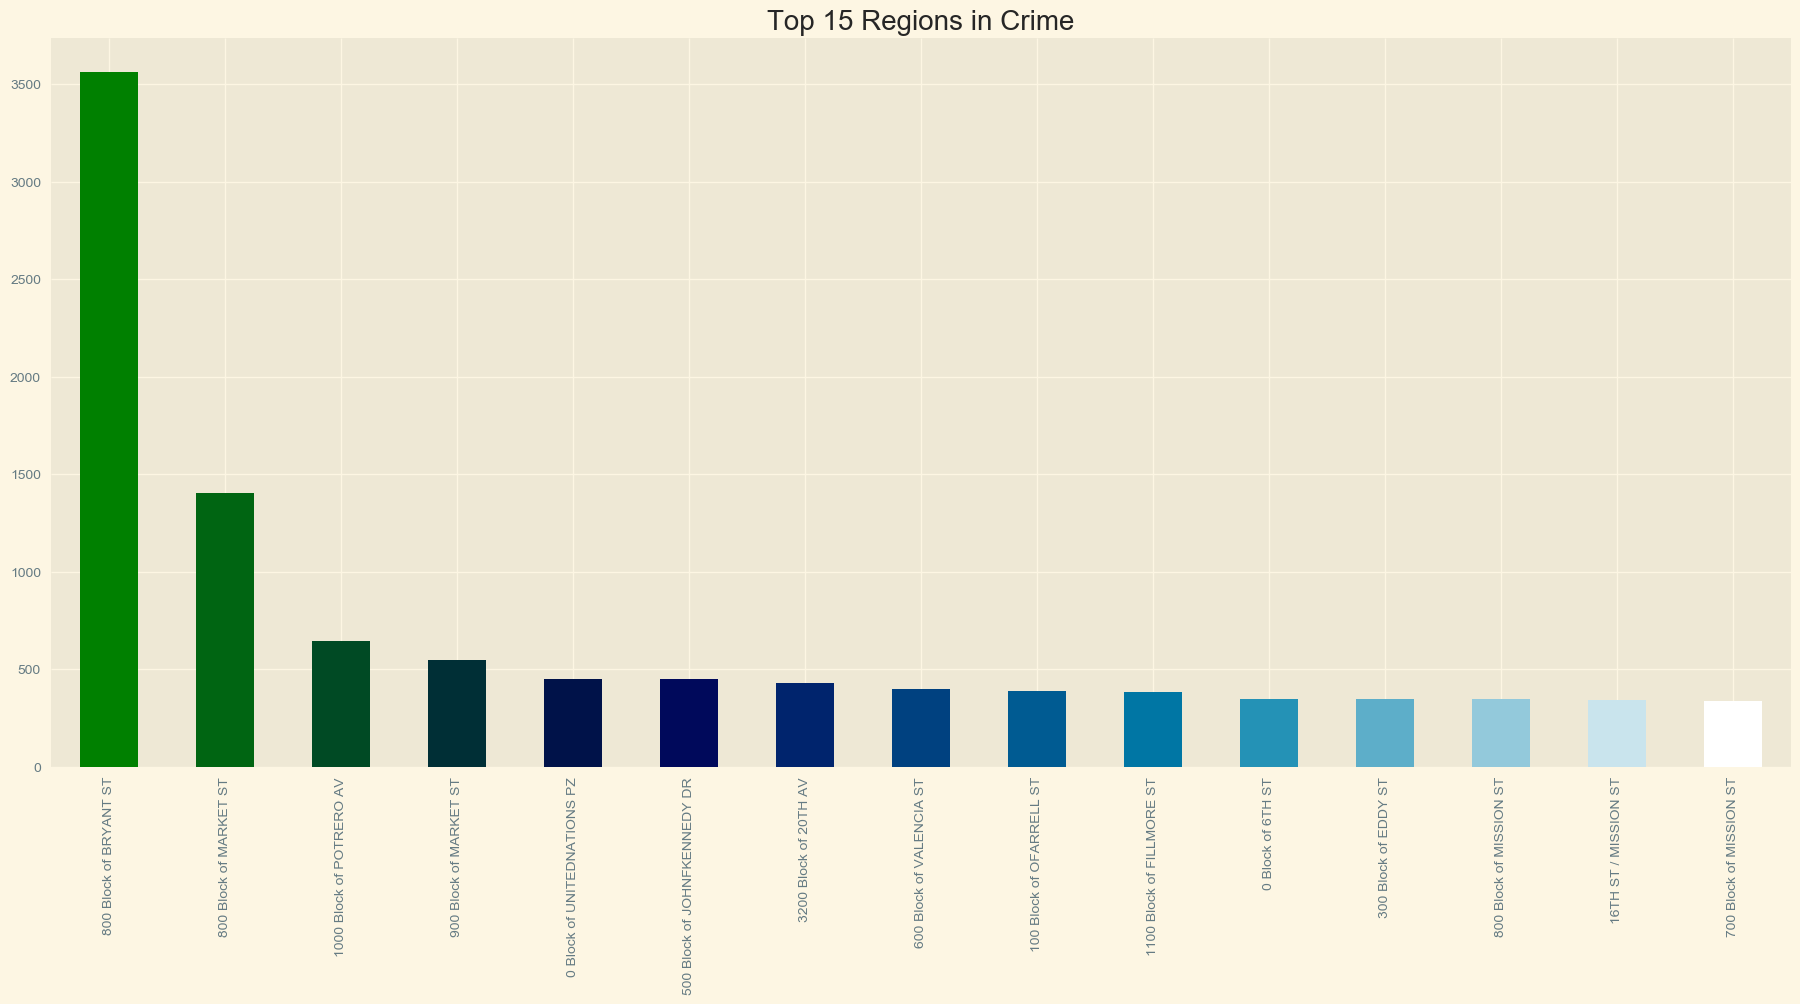

In [149]:
# Regions with count of crimes

plt.rcParams['figure.figsize'] = (20, 9)
plt.style.use('Solarize_Light2')

color = plt.cm.ocean(np.linspace(0, 1, 15))
crimeData1['Address'].value_counts().head(15).plot.bar(color = color)

plt.title('Top 15 Regions in Crime',fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

# Crime variation by days:

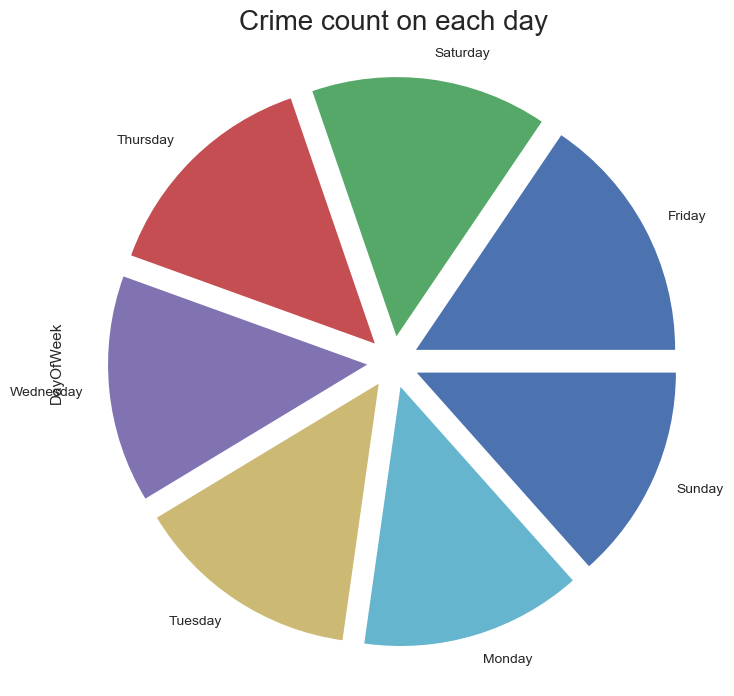

In [150]:
plt.style.use('seaborn')


crimeData1['DayOfWeek'].value_counts().head(15).plot.pie(figsize = (15, 8), explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))

plt.title('Crime count on each day',fontsize = 20)

plt.xticks(rotation = 90)
plt.show()

# Observation:
**Here we can observe that crime is equaly probable to occur on any days**

# Crime variation with time:

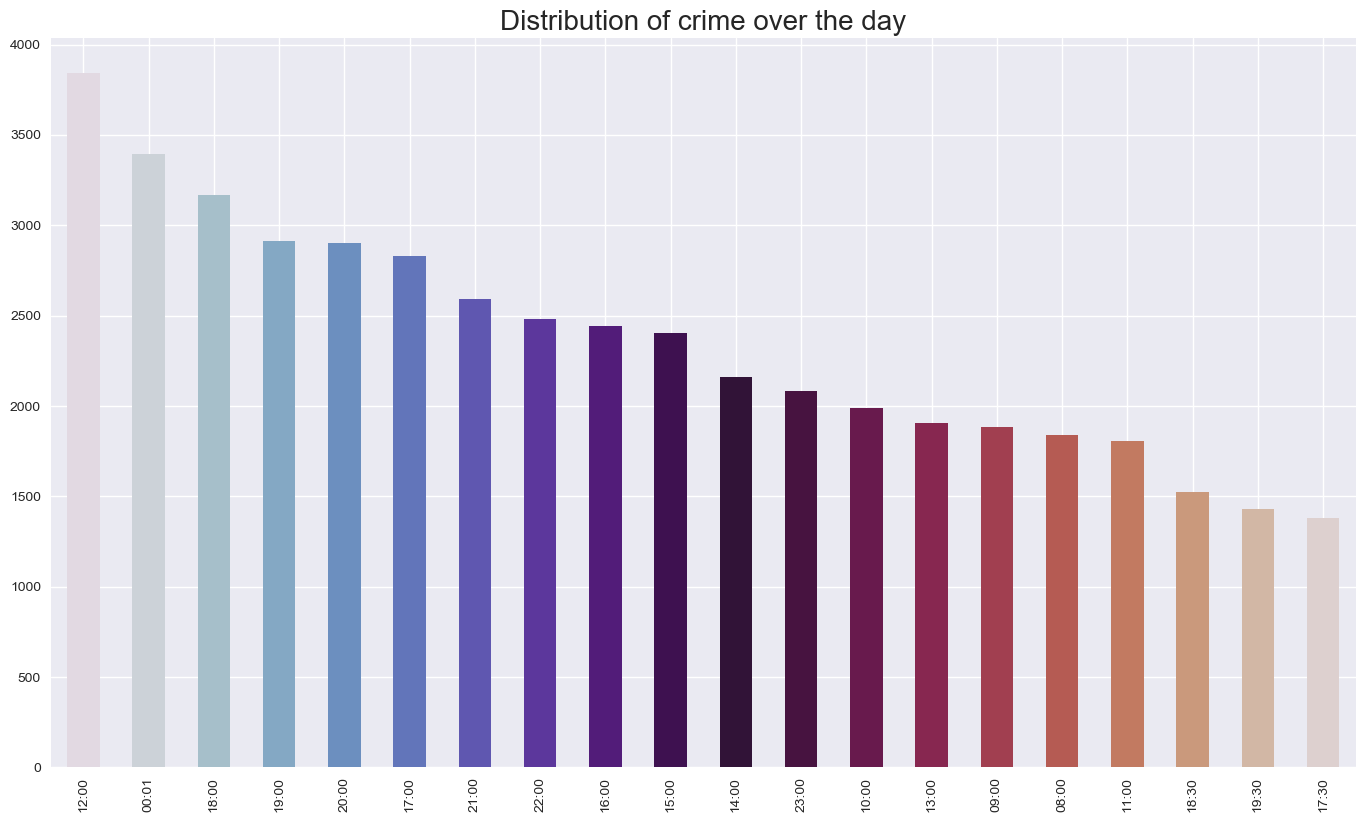

In [151]:
warnings.filterwarnings('ignore')

color = plt.cm.twilight(np.linspace(0, 5, 100))
crimeData1['Time'].value_counts().head(20).plot.bar(color = color, figsize = (15, 9))

plt.title('Distribution of crime over the day', fontsize = 20)
plt.show()

# Observation:
**a) Crime are most likely to occur to 12:00 , 00:01, 18:00, 20:00 etc.**

**b) Police have to take care of time factor to during petroling.**

# District vs category of crime:

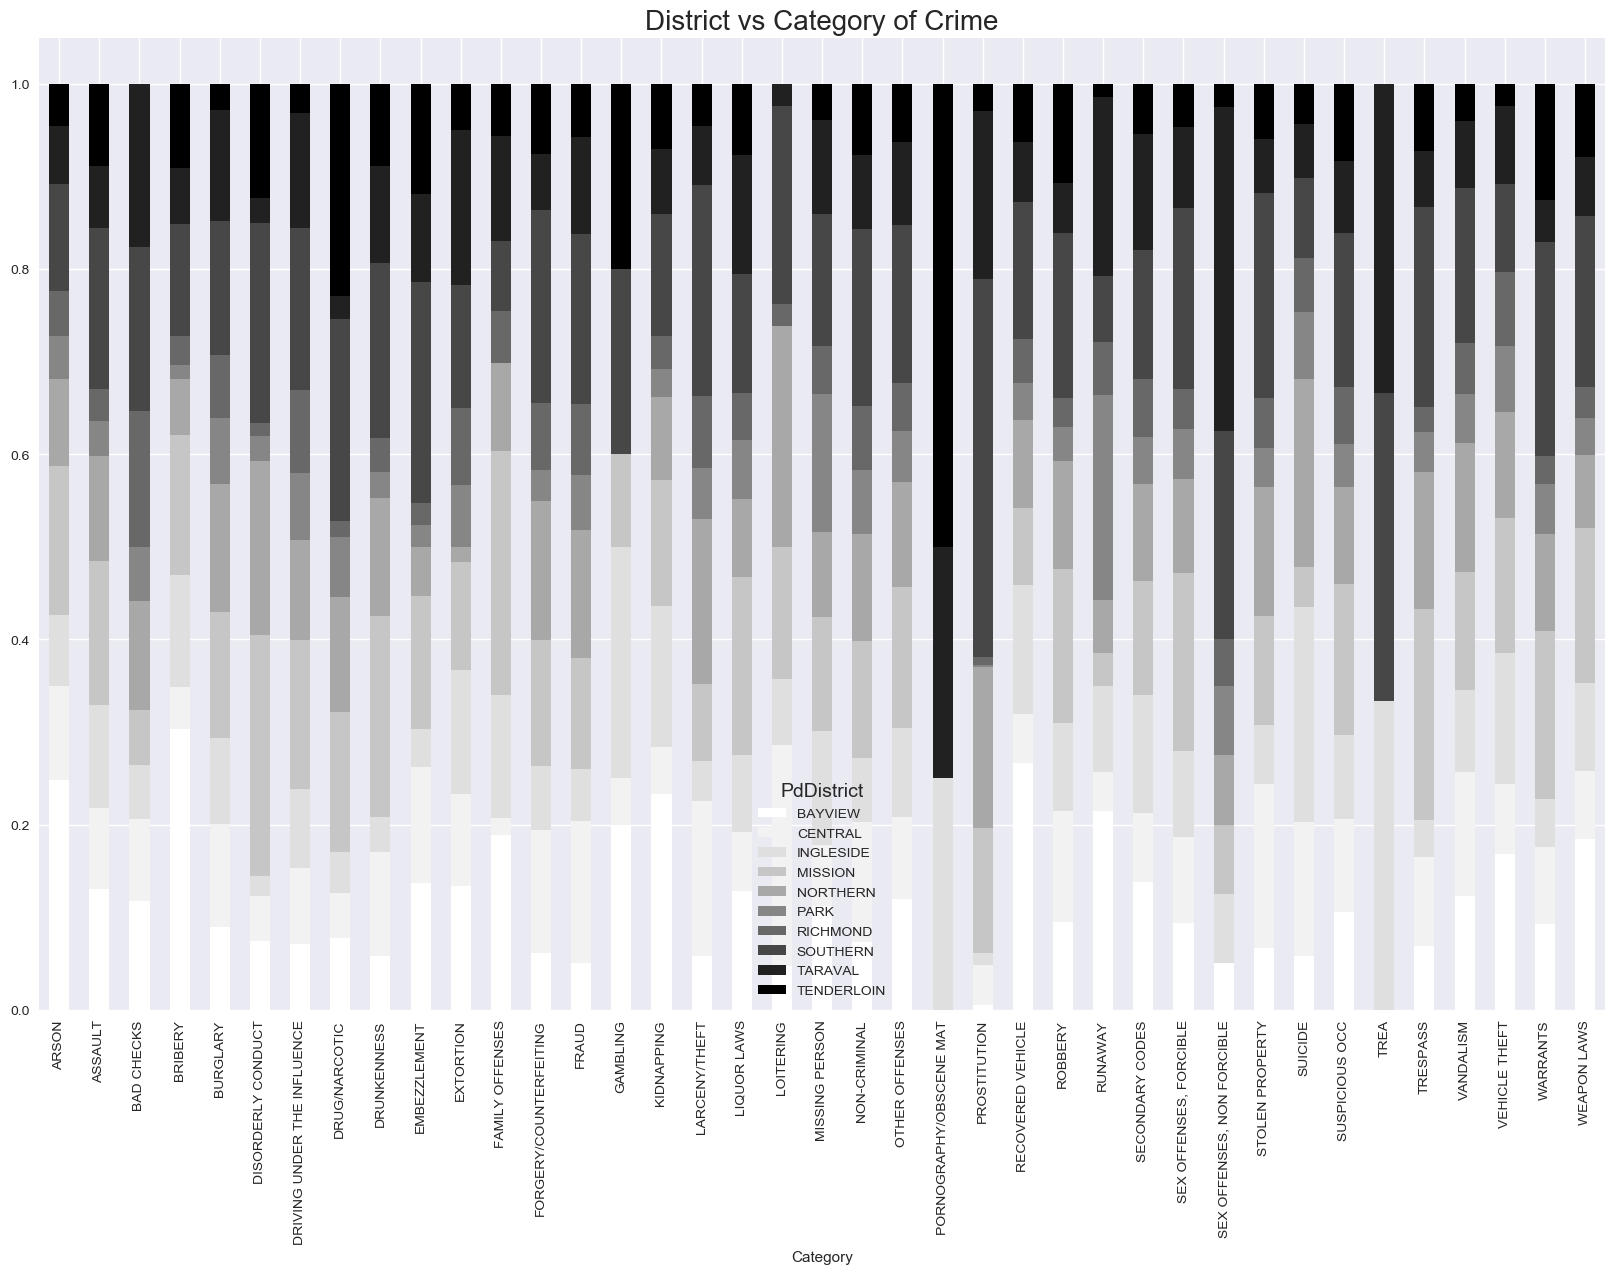

In [152]:
df = pd.crosstab(crimeData1['Category'], crimeData1['PdDistrict'])
color = plt.cm.Greys(np.linspace(0, 1, 10))

df.div(df.sum(1).astype(float), axis = 0).plot.bar(stacked = True, color = color, figsize = (18, 12))
plt.title('District vs Category of Crime', fontweight = 30, fontsize = 20)

plt.xticks(rotation = 90)
plt.show()


# Observation:
**Here police of particular district will able to analyse which crime is affecting that district most.**

# Ploting Crime location on Map:

In [153]:
t = crimeData1.PdDistrict.value_counts()

table = pd.DataFrame(data=t.values, index=t.index, columns=['Count'])
table = table.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])

table = table.reset_index()
table.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)

table


Neighborhood  Count
0      CENTRAL  17666
1     NORTHERN  20100
2         PARK   8699
3     SOUTHERN  28445
4      MISSION  19503
5   TENDERLOIN   9942
6     RICHMOND   8922
7      TARAVAL  11325
8    INGLESIDE  11594
9      BAYVIEW  14303

In [154]:
gjson = r'https://cocl.us/sanfran_geojson'
sf_map = folium.Map(location = [37.77, -122.42], zoom_start = 13)
sf_map.choropleth(
    geo_data=gjson,
    data=table,
    columns=['Neighborhood', 'Count'],
    key_on='feature.properties.DISTRICT',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime Rate in San Francisco'
)

sf_map

# Observation:
**Here we are dividing map in section on the basis of number of crime occur on particular section so that police while going for petroling able to know which section of the city are more affected by crime.**

In [155]:
data =crimeData1

# Store our latitude and longitude
latitudes = data["Y"]
longitudes = data["X"]

# Creating the location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
gmap = gmplot.GoogleMapPlotter(37.77, -122.365565, 12)

# Overlay our datapoints onto the map
gmap.heatmap(latitudes, longitudes)

# Generate the heatmap into an HTML file
gmap.draw("my_heatmap.html")
#it will also going to run on jupyter notebook

# Observation:
In this section map is draw in .html format. 

# Categories wise crime ploting:

In [156]:
from folium.plugins import HeatMap
df = crimeData1
# X und Y not null
df = df[(df['X'] != 0) & (df['Y'] != 0)]

# Create dataset, crime = burglary
crime_vehicle_theft =  df[(df['Category'] == "VEHICLE THEFT")]
#testvehth = vehth[:50]

# Create map, centre of San Francisco
map_van = folium.Map(location = [37.773972, -122.431297], zoom_start = 13)

# Create list with x- and y-coordinates, add to map, show map
heat_data = [[row['Y'],row['X']] for index, row in crime_vehicle_theft.iterrows()]
HeatMap(heat_data).add_to(map_van)
map_van

# Observation:
**It is the most  dominating crime in the city.**

In [157]:
df = df[(df['X'] != 0) & (df['Y'] != 0)]

# Create dataset, crime = burglary
crime_Assault =  df[(df['Category'] == "ASSAULT")]

# Create map, centre of San Francisco
map_van = folium.Map(location = [37.773972, -122.431297], zoom_start = 13)

# Create list with x- and y-coordinates, add to map, show map
heat_data = [[row['Y'],row['X']] for index, row in crime_Assault.iterrows()]
HeatMap(heat_data).add_to(map_van)
map_van

In [158]:
df = df[(df['X'] != 0) & (df['Y'] != 0)]

# Create dataset, crime = burglary
crime_Narcotic =  df[(df['Category'] == "DRUG/NARCOTIC")]

# Create map, centre of San Francisco
map_van = folium.Map(location = [37.773972, -122.431297], zoom_start = 13)

# Create list with x- and y-coordinates, add to map, show map
heat_data = [[row['Y'],row['X']] for index, row in crime_Narcotic.iterrows()]
HeatMap(heat_data).add_to(map_van)
map_van

In [159]:
df = df[(df['X'] != 0) & (df['Y'] != 0)]

# Create dataset, crime = burglary
crime_sex_related =  df[(df['Category'] == "WEAPON LAWS")]
#testvehth = vehth[:50]

# Create map, centre of San Francisco
map_van = folium.Map(location = [37.773972, -122.431297], zoom_start = 13)

# Create list with x- and y-coordinates, add to map, show map
heat_data = [[row['Y'],row['X']] for index, row in crime_sex_related.iterrows()]
HeatMap(heat_data).add_to(map_van)
map_van

# Observation:
**In the above three map i plot which i think is in the top priority for any police system. So, i try to help them by plotting it so that they can do there best to reduce that crime and the city safe for us.**

In [160]:
import pandas as pd

data_df = pd.read_csv("crime1.csv");
data_df.head()

IncidntNum      Category                                        Descript  \
0   120058272   WEAPON LAWS                       POSS OF PROHIBITED WEAPON   
1   120058272   WEAPON LAWS  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE   
2   141059263      WARRANTS                                  WARRANT ARREST   
3   160013662  NON-CRIMINAL                                   LOST PROPERTY   
4   160002740  NON-CRIMINAL                                   LOST PROPERTY   

  DayOfWeek                    Date   Time  PdDistrict      Resolution  \
0    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
1    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
2    Monday  04/25/2016 12:00:00 AM  14:59     BAYVIEW  ARREST, BOOKED   
3   Tuesday  01/05/2016 12:00:00 AM  23:50  TENDERLOIN            NONE   
4    Friday  01/01/2016 12:00:00 AM  00:30     MISSION            NONE   

                  Address           X          Y  \
0  800 Block of BRYANT ST -122.403405  37.775421   
1  800 Block of BRYANT ST -122.403405  37.775421   
2   KEITH ST / SHAFTER AV -122.388856  37.729981   
3  JONES ST / OFARRELL ST -122.412971  37.785788   
4    16TH ST / MISSION ST -122.419672  37.765050   

                                Location            PdId  
0   (37.775420706711, -122.403404791479)  12005827212120  
1   (37.775420706711, -122.403404791479)  12005827212168  
2  (37.7299809672996, -122.388856204292)  14105926363010  
3  (37.7857883766888, -122.412970537591)  16001366271000  
4  (37.7650501214668, -122.419671780296)  16000274071000

In [161]:
print(type(data_df))
print(data_df.shape)

<class 'pandas.core.frame.DataFrame'>
(150500, 13)


In [162]:
print(data_df[:2])

   IncidntNum     Category                                        Descript  \
0   120058272  WEAPON LAWS                       POSS OF PROHIBITED WEAPON   
1   120058272  WEAPON LAWS  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE   

  DayOfWeek                    Date   Time PdDistrict      Resolution  \
0    Friday  01/29/2016 12:00:00 AM  11:00   SOUTHERN  ARREST, BOOKED   
1    Friday  01/29/2016 12:00:00 AM  11:00   SOUTHERN  ARREST, BOOKED   

                  Address           X          Y  \
0  800 Block of BRYANT ST -122.403405  37.775421   
1  800 Block of BRYANT ST -122.403405  37.775421   

                               Location            PdId  
0  (37.775420706711, -122.403404791479)  12005827212120  
1  (37.775420706711, -122.403404791479)  12005827212168  


In [163]:
data_df.sort_values(by=['Date', 'Time'])
# data_df.to_csv('./data/crimedata.csv', sep= ",", encoding="utf8")

IncidntNum                     Category  \
578      160040847               SUSPICIOUS OCC   
886      160049708                 NON-CRIMINAL   
2796     151123444       FORGERY/COUNTERFEITING   
2797     151123444                 NON-CRIMINAL   
4081     160193195                      ASSAULT   
...            ...                          ...   
137155   170000029                     WARRANTS   
137327   170006049                      ASSAULT   
149125   176000930                LARCENY/THEFT   
149873   176004039                 NON-CRIMINAL   
19116    170000198  DRIVING UNDER THE INFLUENCE   

                                          Descript DayOfWeek  \
578                          SUSPICIOUS OCCURRENCE    Friday   
886                                  LOST PROPERTY    Friday   
2796                   FINANCIAL STATEMENTS, FALSE    Friday   
2797                                  CASE CLOSURE    Friday   
4081                                       BATTERY    Friday   
...                                            ...       ...   
137155                              WARRANT ARREST  Saturday   
137327                 INFLICT INJURY ON COHABITEE  Saturday   
149125                GRAND THEFT FROM LOCKED AUTO  Saturday   
149873                               LOST PROPERTY  Saturday   
19116   DRIVING WHILE UNDER THE INFLUENCE OF DRUGS  Saturday   

                          Date   Time  PdDistrict      Resolution  \
578     01/01/2016 12:00:00 AM  00:01   INGLESIDE            NONE   
886     01/01/2016 12:00:00 AM  00:01    NORTHERN            NONE   
2796    01/01/2016 12:00:00 AM  00:01     CENTRAL       UNFOUNDED   
2797    01/01/2016 12:00:00 AM  00:01     CENTRAL       UNFOUNDED   
4081    01/01/2016 12:00:00 AM  00:01    NORTHERN            NONE   
...                        ...    ...         ...             ...   
137155  12/31/2016 12:00:00 AM  23:46  TENDERLOIN  ARREST, BOOKED   
137327  12/31/2016 12:00:00 AM  23:50     BAYVIEW            NONE   
149125  12/31/2016 12:00:00 AM  23:50     CENTRAL            NONE   
149873  12/31/2016 12:00:00 AM  23:50    SOUTHERN            NONE   
19116   12/31/2016 12:00:00 AM  23:58     MISSION  ARREST, BOOKED   

                         Address           X          Y  \
578        800 Block of ROLPH ST -122.428641  37.711189   
886     1300 Block of VANNESS AV -122.421734  37.788296   
2796       600 Block of GEARY ST -122.414011  37.786677   
2797       600 Block of GEARY ST -122.414011  37.786677   
4081       1000 Block of POLK ST -122.419858  37.786137   
...                          ...         ...        ...   
137155        0 Block of TURK ST -122.409854  37.783386   
137327       0 Block of REUEL CT -122.382920  37.736412   
149125     500 Block of GEARY ST -122.411956  37.786939   
149873  FREMONT ST / HARRISON ST -122.392055  37.786766   
19116    2200 Block of BRYANT ST -122.409770  37.758817   

                                     Location            PdId  
578     (37.7111887011083, -122.428641379657)  16004084764070  
886     (37.7882961275539, -122.421734189838)  16004970871000  
2796    (37.7866770011071, -122.414010814727)  15112344409167  
2797    (37.7866770011071, -122.414010814727)  15112344475030  
4081     (37.786137125238, -122.419858277339)  16019319504134  
...                                       ...             ...  
137155  (37.7833862379382, -122.409853729941)  17000002963010  
137327  (37.7364122533313, -122.382919646324)  17000604915040  
149125  (37.7869391910697, -122.411955869906)  17600093006244  
149873  (37.7867658932764, -122.392055370759)  17600403971000  
19116   (37.7588168712302, -122.409769737777)  17000019865060  

[150500 rows x 13 columns]

In [164]:
print(data_df.shape)

(150500, 13)


In [165]:
for col in data_df.columns:
    print(col)

IncidntNum
Category
Descript
DayOfWeek
Date
Time
PdDistrict
Resolution
Address
X
Y
Location
PdId


# Preprocessing of data:

In [166]:
data_df = data_df.dropna(how='any',axis=0)
print(data_df[:1])

   IncidntNum     Category                   Descript DayOfWeek  \
0   120058272  WEAPON LAWS  POSS OF PROHIBITED WEAPON    Friday   

                     Date   Time PdDistrict      Resolution  \
0  01/29/2016 12:00:00 AM  11:00   SOUTHERN  ARREST, BOOKED   

                  Address           X          Y  \
0  800 Block of BRYANT ST -122.403405  37.775421   

                               Location            PdId  
0  (37.775420706711, -122.403404791479)  12005827212120  


In [167]:
def convert_date_to_day(dt):
    result = re.findall(r'\d{4}-(\d{2})-(\d{2})T00:00:00.000',dt)
    return result[0][1]
   
def convert_date_to_month(dt):
    result = re.findall(r'\d{4}-(\d{2})-(\d{2})T00:00:00.000',dt)
    return result[0][0]

def convert_time_to_hour(tm):
    result = re.findall(r'(\d{2}):\d{2}',tm)
    return result[0]


In [168]:
data_df['Date'] = pd.to_datetime(data_df['Date'], errors='coerce')

In [169]:
def feature_engineering(data):
    data['Day'] = data['Date'].dt.day
    data['Month'] = data['Date'].dt.month
    data['Year'] = data['Date'].dt.year
    data['Hour'] = data['Date'].dt.hour
    data['Minute'] = data['Date'].dt.minute
    return data

In [170]:
data_df = feature_engineering(data_df)
data_df.head()

IncidntNum      Category                                        Descript  \
0   120058272   WEAPON LAWS                       POSS OF PROHIBITED WEAPON   
1   120058272   WEAPON LAWS  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE   
2   141059263      WARRANTS                                  WARRANT ARREST   
3   160013662  NON-CRIMINAL                                   LOST PROPERTY   
4   160002740  NON-CRIMINAL                                   LOST PROPERTY   

  DayOfWeek       Date   Time  PdDistrict      Resolution  \
0    Friday 2016-01-29  11:00    SOUTHERN  ARREST, BOOKED   
1    Friday 2016-01-29  11:00    SOUTHERN  ARREST, BOOKED   
2    Monday 2016-04-25  14:59     BAYVIEW  ARREST, BOOKED   
3   Tuesday 2016-01-05  23:50  TENDERLOIN            NONE   
4    Friday 2016-01-01  00:30     MISSION            NONE   

                  Address           X          Y  \
0  800 Block of BRYANT ST -122.403405  37.775421   
1  800 Block of BRYANT ST -122.403405  37.775421   
2   KEITH ST / SHAFTER AV -122.388856  37.729981   
3  JONES ST / OFARRELL ST -122.412971  37.785788   
4    16TH ST / MISSION ST -122.419672  37.765050   

                                Location            PdId  Day  Month  Year  \
0   (37.775420706711, -122.403404791479)  12005827212120   29      1  2016   
1   (37.775420706711, -122.403404791479)  12005827212168   29      1  2016   
2  (37.7299809672996, -122.388856204292)  14105926363010   25      4  2016   
3  (37.7857883766888, -122.412970537591)  16001366271000    5      1  2016   
4  (37.7650501214668, -122.419671780296)  16000274071000    1      1  2016   

   Hour  Minute  
0     0       0  
1     0       0  
2     0       0  
3     0       0  
4     0       0

In [171]:
df = data_df.drop(['IncidntNum','PdId','Resolution','Date', 'Time', 'Descript', 'Location'], axis =1)
for col in df.columns:
    print(col)

Category
DayOfWeek
PdDistrict
Address
X
Y
Day
Month
Year
Hour
Minute


In [172]:
# df.sort_values(by=['date'])
df['Category'] = df.Category.apply(lambda x: x.lower())
df['DayOfWeek'] = df.DayOfWeek.apply(lambda x: x.lower())
df['Address'] = df.Address.apply(lambda x: x.lower())
df['PdDistrict'] = df.PdDistrict.apply(lambda x: x.lower())

In [173]:
df['X'] = df.X.apply(lambda x: round(float(x),2))
df['Y'] = df.Y.apply(lambda y: round(float(y),2))

# Crime Categories

In [174]:
uniqe_crime = {}
i = 0
for index,row in df.iterrows():
    if row['Category'] not in uniqe_crime.keys():
        uniqe_crime[row['Category']] = i
        i = i+1

In [175]:
print(len(uniqe_crime))
print(uniqe_crime)

39
{'weapon laws': 0, 'warrants': 1, 'non-criminal': 2, 'assault': 3, 'other offenses': 4, 'missing person': 5, 'larceny/theft': 6, 'burglary': 7, 'stolen property': 8, 'robbery': 9, 'fraud': 10, 'drug/narcotic': 11, 'vehicle theft': 12, 'recovered vehicle': 13, 'vandalism': 14, 'arson': 15, 'prostitution': 16, 'secondary codes': 17, 'suspicious occ': 18, 'drunkenness': 19, 'trespass': 20, 'sex offenses, non forcible': 21, 'sex offenses, forcible': 22, 'runaway': 23, 'kidnapping': 24, 'disorderly conduct': 25, 'driving under the influence': 26, 'forgery/counterfeiting': 27, 'embezzlement': 28, 'bribery': 29, 'family offenses': 30, 'gambling': 31, 'suicide': 32, 'liquor laws': 33, 'extortion': 34, 'loitering': 35, 'trea': 36, 'bad checks': 37, 'pornography/obscene mat': 38}


In [176]:
index_crimes = ['ROBBERY', 'BURGLARY', 'LARCENY/THEFT', 'ASSAULT', 'ARSON', 'SEX OFFENSES, FORCIBLE', 'SECONDARY CODES',  'RECOVERED VEHICLE']
print(len(index_crimes))

# Define Non-Index Crimes (Less Serious)
non_index_crimes = ['OTHER OFFENSES', 'VEHICLE THEFT', 'NON-CRIMINAL', 'SUSPICIOUS OCC', 'FRAUD', 'FORGERY/COUNTERFEITING', 'WARRANTS', 'VANDALISM', 'MISSING PERSON', 'DISORDERLY CONDUCT', 'TRESPASS', 'WEAPON LAWS', 'DRUG/NARCOTIC', 'STOLEN PROPERTY', 'DRUNKENNESS', 'EMBEZZLEMENT', 'LOITERING', 'DRIVING UNDER THE INFLUENCE', 'PROSTITUTION', 'LIQUOR LAWS', 'EXTORTION', 'RUNAWAY', 'SUICIDE', 'BAD CHECKS', 'KIDNAPPING', 'FAMILY OFFENSES', 'BRIBERY', 'GAMBLING', 'SEX OFFENSES, NON FORCIBLE', 'PORNOGRAPHY/OBSCENE MAT', 'TREA']
len(non_index_crimes)

8


31

In [177]:
severity = []
for index, row in df.iterrows():
    if row['Category'].upper() in index_crimes:
        severity.append('INDEX')
    else:
        severity.append('NONINDEX')

In [178]:
print(len(severity))
print(df.shape)

150499
(150499, 11)


In [179]:
df['severity'] = severity

In [180]:
print(df['Category'][:10])
print(df['severity'][:10])

0       weapon laws
1       weapon laws
2          warrants
3      non-criminal
4      non-criminal
5           assault
6    other offenses
7      non-criminal
8          warrants
9    missing person
Name: Category, dtype: object
0    NONINDEX
1    NONINDEX
2    NONINDEX
3    NONINDEX
4    NONINDEX
5       INDEX
6    NONINDEX
7    NONINDEX
8    NONINDEX
9    NONINDEX
Name: severity, dtype: object


In [181]:
print(df.shape)

(150499, 12)


# Label Encoding to convert string to int

In [182]:
lnc = LabelEncoder()

In [183]:
def perform_label_encoding(temp_df):
    temp = lnc.fit_transform(temp_df.DayOfWeek.iloc[:].values)
    temp_df['DayOfWeek'] = temp
    temp = lnc.fit_transform(temp_df.Address.iloc[:].values)
    temp_df['Address'] = temp
    temp = lnc.fit_transform(temp_df.Category.iloc[:].values)
    temp_df['Category'] = temp
    return temp_df

In [184]:
df = perform_label_encoding(df)
print(type(df))
print(df.shape)
print(df[:5])
# perform_label_encoding(sev_df)

<class 'pandas.core.frame.DataFrame'>
(150499, 12)
   Category  DayOfWeek  PdDistrict  Address       X      Y  Day  Month  Year  \
0        38          0    southern     9418 -122.40  37.78   29      1  2016   
1        38          0    southern     9418 -122.40  37.78   29      1  2016   
2        37          1     bayview    12994 -122.39  37.73   25      4  2016   
3        20          5  tenderloin    12883 -122.41  37.79    5      1  2016   
4        20          0     mission     3560 -122.42  37.77    1      1  2016   

   Hour  Minute  severity  
0     0       0  NONINDEX  
1     0       0  NONINDEX  
2     0       0  NONINDEX  
3     0       0  NONINDEX  
4     0       0  NONINDEX  


# Categorize all data by district in dictionary

In [185]:
series = df.groupby('PdDistrict').apply(list)
dictionary = {}

In [186]:
series = df.groupby('PdDistrict').apply(list)
dictionary = {}
city_target = df.get('severity').tolist()
unique_target=set(city_target)
print(len(unique_target))
print(len(city_target))

2
150499


In [187]:
for s in series.keys():
    print(str(s))
    mask = df['PdDistrict'] == str(s)
#     print(df[mask])
    dictionary[str(s)] = df[mask]

bayview
central
ingleside
mission
northern
park
richmond
southern
taraval
tenderloin


In [188]:
print(type(dictionary['central']))
print(dictionary.keys())

<class 'pandas.core.frame.DataFrame'>
dict_keys(['bayview', 'central', 'ingleside', 'mission', 'northern', 'park', 'richmond', 'southern', 'taraval', 'tenderloin'])


# manipulation of District data

In [189]:
def fetchDistrictData(district):
    target = (dictionary.get(district))['severity']
    tempdf = (dictionary.get(district)).drop(['PdDistrict', 'severity', 'Category'], axis =1)
    return tempdf, target

In [190]:
district_bayview, district_bayview_target = fetchDistrictData('bayview')
print(len(district_bayview_target))
print(len(set(district_bayview_target)))

14303
2


# Breaking data in Train and Test:

In [191]:
def fetchTrainTestData(district_df, district_target):
    X_train, X_test, y_train, y_test = train_test_split(district_df, district_target, test_size=0.20, random_state=42)
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)
    return X_train, X_test, y_train, y_test

# Classification of Data:

In [192]:
def classify(clf, X_train, Y_train, X_test):
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, Y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)
    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)
    print(type(pred))
    return pred

In [193]:
def predictCrimeCategory(city, obj):
    district_df, district_target = fetchDistrictData(city)
    X_train, X_test, y_train, y_test = fetchTrainTestData(district_df, district_target)
    pred = classify(obj, X_train, y_train, X_test)
    score = f1_score(y_test, pred, average='macro')
    return pred, score

In [194]:
def writeToFile(pred, path):
    print(path)
    with open(path,'w+') as f:
        for p in pred:
            f.write(str(p)+"\n")

In [195]:
def classifyAllDistricts(clf, path = ""):
    dict_district_acc = {}
    dict_district_pred = {}
    dict_district_test = {}
    for key in dictionary.keys():
        pred, score, y_test = predictCrimeCategory(key, clf)
        dict_district_acc[key] = score
        dict_district_pred[key] = pred
        dict_district_test[key] = y_test
        writeToFile(pred, path+key+".dat")
    print(dict_district_acc)
    return dict_district_acc, dict_district_pred

In [196]:
decisiontree_parameters = {
    'splitter':['best','random'],
    'criterion' : ['gini','entropy'],
    'max_features' : ['auto', 'sqrt', 'log2'],
    }
neighbor_params = {
    'n_neighbors': [2, 3, 4], 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
randomforest_parameters = {
    'n_estimators':[10,20],
    'max_depth' : [None,50,70]
    }

In [197]:
# # #Decision Tree
knn_pred1, knn_score1 = predictCrimeCategory('tenderloin', KNeighborsClassifier(n_neighbors = 3))
print(knn_pred1,knn_score1)    

(7953, 9)
(1989, 9)
(7953,)
(1989,)
Training: 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
train time: 0.162s
test time:  0.124s
<class 'numpy.ndarray'>
['NONINDEX' 'NONINDEX' 'NONINDEX' ... 'NONINDEX' 'NONINDEX' 'INDEX'] 0.5699553738416998


In [198]:
tree_pred1, tree_score1 = predictCrimeCategory('tenderloin', GridSearchCV(tree.DecisionTreeClassifier(), decisiontree_parameters))

(7953, 9)
(1989, 9)
(7953,)
(1989,)
Training: 
GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         

In [199]:
forest_pred1, forest_score1 = predictCrimeCategory('tenderloin', GridSearchCV(RandomForestClassifier(), randomforest_parameters))

(7953, 9)
(1989, 9)
(7953,)
(1989,)
Training: 
GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [200]:
print(knn_score1, tree_score1)

0.5699553738416998 0.5887409506201001


In [201]:
final_pred = {}

In [202]:
def generateAverageScore(kneighbor_pred, decisiontree_pred, randomforest_pred):
    list = []
    length = len(kneighbor_pred)
    print(length)
    for i in range(length):
        ind = 0
        non_ind = 0
        if kneighbor_pred[i] is "INDEX":
            ind+=1
        else:
            non_ind+=1
        if decisiontree_pred[i] is "INDEX":
            ind+=1
        else:
            non_ind+=1            
        if randomforest_pred[i] is "INDEX":
            ind+=1
        else:
            non_ind+=1
        if ind>non_ind:
            list.append("INDEX")
        else:
            list.append("NONINDEX")
    print(len(list))
    print(list[:5])
    return list
#     final_pred[key] = list

In [203]:
def ensamble_classifiers(district, city = False):
    #Fetch district data
    if city is True:
        district_target = df['severity']
        district_df = df.drop(['pddistrict', 'severity', 'category'], axis =1)
    else:
        district_df, district_target = fetchDistrictData(district)
    X_train, X_test, y_train, y_test = fetchTrainTestData(district_df, district_target)
    #Classifiers
    kneighbor_pred  = classify(KNeighborsClassifier(n_neighbors = 3), X_train, y_train, X_test)
    score1 = f1_score(y_test, kneighbor_pred, average='macro')
    print("KNN: ", score1)
    decisiontree_pred = classify(GridSearchCV(tree.DecisionTreeClassifier(), decisiontree_parameters), 
                                X_train, y_train, X_test)
    score2 = f1_score(y_test, decisiontree_pred, average='macro')
    print("Decision Tree: ", score2)
    randomforest_pred = classify(GridSearchCV(RandomForestClassifier(), randomforest_parameters), 
                                 X_train, y_train, X_test)
    score3 = f1_score(y_test, randomforest_pred, average='macro')
    print("Random Forest: ", score3)
    
    list = generateAverageScore(kneighbor_pred, decisiontree_pred, randomforest_pred)
    score = f1_score(y_test, list, average='macro')
    print(district ,"Final F1 Score: " , score )
    return score

In [204]:
def ensamble_classifiers_fetch_allscores(district, city = False):
    #Fetch district data
    if city is True:
        district_target = df['severity']
        district_df = df.drop(['pddistrict', 'severity', 'category'], axis =1)
    else:
        district_df, district_target = fetchDistrictData(district)
    X_train, X_test, y_train, y_test = fetchTrainTestData(district_df, district_target)
    #Classifiers
    kneighbor_pred  = classify(KNeighborsClassifier(n_neighbors = 3), X_train, y_train, X_test)
    score1 = f1_score(y_test, kneighbor_pred, average='macro')
    print("KNN: ", score1)
    decisiontree_pred = classify(GridSearchCV(tree.DecisionTreeClassifier(), decisiontree_parameters), 
                                X_train, y_train, X_test)
    score2 = f1_score(y_test, decisiontree_pred, average='macro')
    print("Decision Tree: ", score2)
    randomforest_pred = classify(GridSearchCV(RandomForestClassifier(), randomforest_parameters), 
                                 X_train, y_train, X_test)
    score3 = f1_score(y_test, randomforest_pred, average='macro')
    print("Random Forest: ", score3)
    
    list = generateAverageScore(kneighbor_pred, decisiontree_pred, randomforest_pred)
    score = f1_score(y_test, list, average='macro')
    print(district ,"Final F1 Score: " , score )
    scores = [score1, score2, score3, score]
    return scores

In [205]:
ensamble_district_acc = {}

In [206]:
for key in dictionary.keys():
    ensamble_district_acc[key] = ensamble_classifiers(key)

(11442, 9)
(2861, 9)
(11442,)
(2861,)
Training: 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
train time: 0.048s
test time:  0.153s
<class 'numpy.ndarray'>
KNN:  0.5790409441517788
Training: 
GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weigh

train time: 2.501s
test time:  0.012s
<class 'numpy.ndarray'>
Random Forest:  0.5870533520052729
2319
2319
['INDEX', 'INDEX', 'INDEX', 'NONINDEX', 'NONINDEX']
ingleside Final F1 Score:  0.5875419767301114
(15602, 9)
(3901, 9)
(15602,)
(3901,)
Training: 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
train time: 0.024s
test time:  0.112s
<class 'numpy.ndarray'>
KNN:  0.5692755935281162
Training: 
GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impu

train time: 1.751s
test time:  0.000s
<class 'numpy.ndarray'>
Random Forest:  0.5835971055729738
1740
1740
['NONINDEX', 'INDEX', 'INDEX', 'NONINDEX', 'NONINDEX']
park Final F1 Score:  0.5911675934183862
(7137, 9)
(1785, 9)
(7137,)
(1785,)
Training: 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
train time: 0.016s
test time:  0.062s
<class 'numpy.ndarray'>
KNN:  0.5858234295415959
Training: 
GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity

train time: 2.348s
test time:  0.016s
<class 'numpy.ndarray'>
Random Forest:  0.5667269012610805
2265
2265
['NONINDEX', 'NONINDEX', 'NONINDEX', 'INDEX', 'NONINDEX']
taraval Final F1 Score:  0.5748551264021132
(7953, 9)
(1989, 9)
(7953,)
(1989,)
Training: 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
train time: 0.016s
test time:  0.047s
<class 'numpy.ndarray'>
KNN:  0.5699553738416998
Training: 
GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_im

In [207]:
ensamble_district_acc['Sanfrancisco'] = ensamble_district_acc

In [208]:
ensamble_district_acc.pop('Sanfrancisco')

{'bayview': 0.6044383931067371,
 'central': 0.5794060667948537,
 'ingleside': 0.5875419767301114,
 'mission': 0.5826578219441798,
 'northern': 0.5820050935995389,
 'park': 0.5911675934183862,
 'richmond': 0.6165842224661912,
 'southern': 0.5693976459870504,
 'taraval': 0.5748551264021132,
 'tenderloin': 0.5929176516942475}

In [209]:
print(ensamble_district_acc.keys())

dict_keys(['bayview', 'central', 'ingleside', 'mission', 'northern', 'park', 'richmond', 'southern', 'taraval', 'tenderloin'])


In [210]:
x_data = []
y_data = []

In [211]:
for key in ensamble_district_acc.keys():
    x_data.append(key)
    y_data.append(ensamble_district_acc.get(key))
x_data.append("City")
y_data.append(ensamble_district_acc)

In [212]:
print(x_data)
print(y_data)

['bayview', 'central', 'ingleside', 'mission', 'northern', 'park', 'richmond', 'southern', 'taraval', 'tenderloin', 'City']
[0.6044383931067371, 0.5794060667948537, 0.5875419767301114, 0.5826578219441798, 0.5820050935995389, 0.5911675934183862, 0.6165842224661912, 0.5693976459870504, 0.5748551264021132, 0.5929176516942475, {'bayview': 0.6044383931067371, 'central': 0.5794060667948537, 'ingleside': 0.5875419767301114, 'mission': 0.5826578219441798, 'northern': 0.5820050935995389, 'park': 0.5911675934183862, 'richmond': 0.6165842224661912, 'southern': 0.5693976459870504, 'taraval': 0.5748551264021132, 'tenderloin': 0.5929176516942475}]


In [213]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

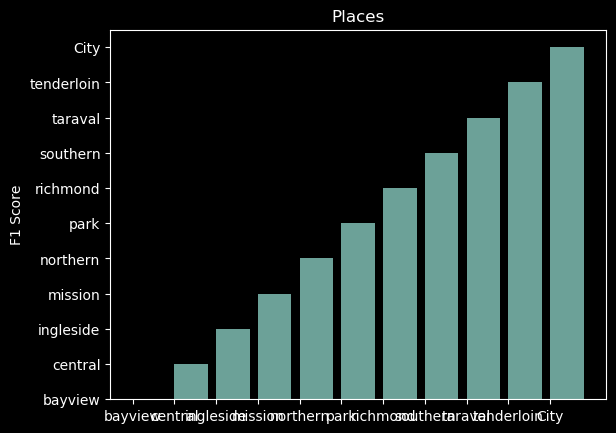

In [214]:
y_pos = np.arange(len(y_data))
plt.style.use('dark_background') 
plt.bar(y_pos, x_data, align='edge', alpha=0.767)
plt.xticks(y_pos, x_data, rotation=0)
plt.ylabel('F1 Score')
plt.title('Places')
plt.rcParams["figure.figsize"]=[16,8]
plt.show()

In [215]:
scores = ensamble_classifiers_fetch_allscores('tenderloin')

(7953, 9)
(1989, 9)
(7953,)
(1989,)
Training: 
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
train time: 0.012s
test time:  0.080s
<class 'numpy.ndarray'>
KNN:  0.5699553738416998
Training: 
GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_

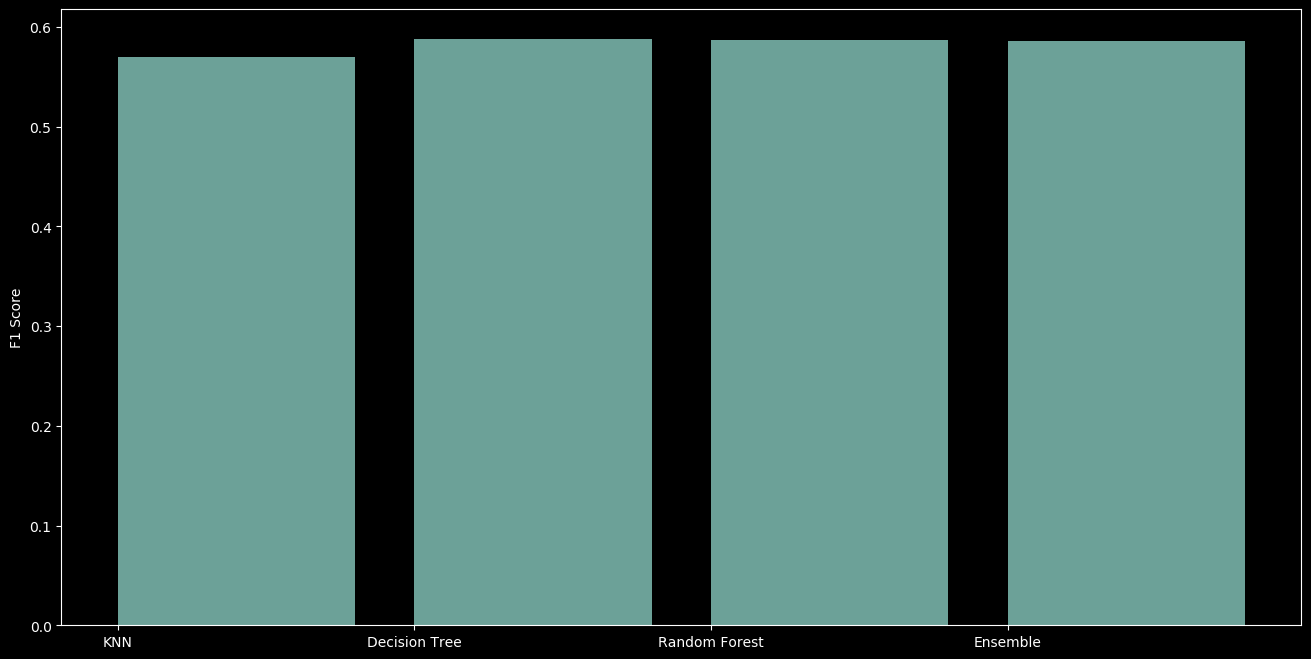

In [216]:
y_pos = np.arange(len(scores))
plt.style.use('dark_background')
labels = ['KNN', 'Decision Tree', 'Random Forest', 'Ensemble']
plt.bar(y_pos, scores, align='edge', alpha=0.767)
plt.xticks(y_pos, labels, rotation=0)
plt.ylabel('F1 Score')
#plt.title('district: tenderloin')
plt.rcParams["figure.figsize"]=[4,8] 
plt.show()

In [217]:
randomforest_parameters1 = {
    'n_estimators':[10,20],
    'max_depth' : [None,50,70]
    }
randomforest_parameters2 = {
    'n_estimators':[10,20],
    'max_depth' : [None,5,10]
    }

In [218]:
forest_pred2, forest_score2 = predictCrimeCategory('tenderloin', GridSearchCV(RandomForestClassifier(), 
                                                                              randomforest_parameters1))

(7953, 9)
(1989, 9)
(7953,)
(1989,)
Training: 
GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

In [219]:
forest_pred3, forest_score3 = predictCrimeCategory('tenderloin', GridSearchCV(RandomForestClassifier(), 
                                                                              randomforest_parameters2))

(7953, 9)
(1989, 9)
(7953,)
(1989,)
Training: 
GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                             

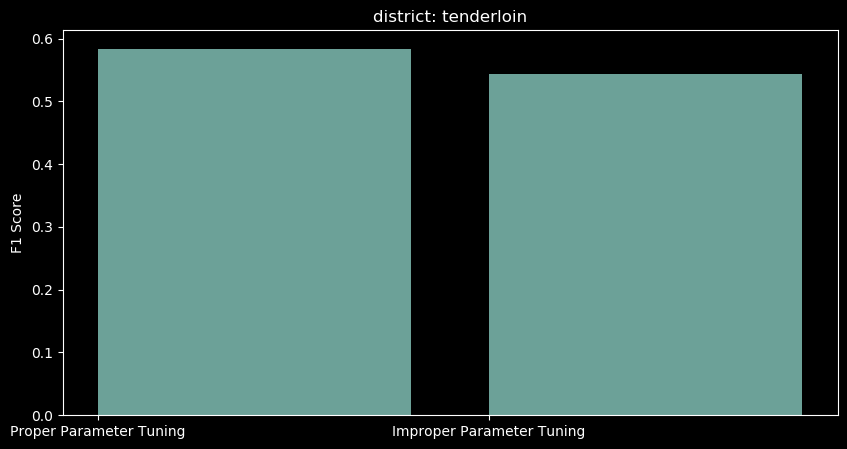

In [236]:
plt.style.use('dark_background')
scores1 = [forest_score2, forest_score3]
y_pos = np.arange(len(scores1))
labels = ['Proper Parameter Tuning', 'Improper Parameter Tuning']
plt.bar(y_pos, scores1, align='edge', alpha=0.767)
plt.xticks(y_pos, labels, rotation=0)
plt.ylabel('F1 Score')
plt.title('district: tenderloin')
plt.rcParams["figure.figsize"]=[10,10] 
plt.show()

In [221]:
print(scores1)

[0.584061442890867, 0.5441008119868097]
